<div style="text-align: center;">
    <h1>Group 34</h1>
</div>


<div style="text-align: center;">

# MACHINE LEARNING PROJECT
## Deliverable #1

**<h3 align="center">CARS 4 YOU</h3>**

<span style="font-size: 24px;">Master in Data Science and Advanced Analytics</span>  
<span style="font-size: 24px;">NOVA Information Management School</span>  
<span style="font-size: 20px;"><i>Group 34</i></span>  
<span style="font-size: 20px;">Fall/Spring Semester 2025-2026</span>

</div>

---

**Carolina Luz** | 20250409 | [20250409@novaims.unl.pt](mailto:20250409@novaims.unl.pt) <br>
**Margarida Quintino** | 20250411 | [20250411@novaims.unl.pt](mailto:20250411@novaims.unl.pt) <br>
**Pedro Castro** | 20250467 | [20250467@novaims.unl.pt](mailto:20250467@novaims.unl.pt)  <br>
**Pedro Carrasqueira** | 20250488 | [20250488@novaims.unl.pt](mailto:20250488@novaims.unl.pt)  


## 1. Project Setup

### 1.1 - Import libraries

In [1]:
# to ensure we can import category_encoders
!pip install category_encoders==2.8.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# data partition / model evaluation
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# pipelines and preprocessing (for Target Encoding)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# regression model
from sklearn.linear_model import Lasso

# target encoding
#import category_encoders as ce  

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### 1.2 - Load data

In [3]:
#Loading the original
train_data_og= pd.read_csv("train.csv")
test_data_og = pd.read_csv("test.csv")

# Keeping a copy
train_data = train_data_og.copy()
test_data = test_data_og.copy()


In [4]:
# Check for missing values in the 'carID' column
train_data['carID'].isna().sum()

np.int64(0)

In [5]:
# Verify duplicate values on 'carID'
train_data[train_data['carID'].duplicated(keep=False)]['carID'].value_counts()

Series([], Name: count, dtype: int64)

In [6]:
# Set index to carID
train_data = pd.DataFrame(train_data).set_index('carID')
print(train_data.head())

        Brand      model    year  price transmission  mileage fuelType    tax  \
carID                                                                           
69512      VW       Golf  2016.0  22290    Semi-Auto  28421.0   Petrol    NaN   
53000  Toyota      Yaris  2019.0  13790       Manual   4589.0   Petrol  145.0   
6366     Audi         Q2  2019.0  24990    Semi-Auto   3624.0   Petrol  145.0   
29021    Ford     FIESTA  2018.0  12500        anual   9102.0   Petrol  145.0   
10062     BMW   2 Series  2019.0  22995       Manual   1000.0   Petrol  145.0   

             mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                   
69512  11.417268         2.0           63.0        4.000000        0.0  
53000  47.900000         1.5           50.0        1.000000        0.0  
6366   40.900000         1.5           56.0        4.000000        0.0  
29021  65.700000         1.0           50.0       -2.340306        

## 2 - Metadata

### Index
* `carID`: An attribute that contains an identifier for each car.

### Categorical Data
* `Brand`: year mileage The car’s main brand (e.g. Ford, Toyota)
* `model`: The car model
* `transmission`: The type of transmission (Manual or Automatic)
* `fuelType`: Type of Fuel used by the car (Diesel, Petrol, Hybrid,Electric)
* `hasDamage`: Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not.

### Numerical Data
* `price`: The car’s price when purchased by Cars 4 You (in £).  
* `year`: The year of Registration of the Car
* `mileage`: The total reported distance travelled by the car (in miles)
* `tax`: The amount of road tax (in £) that, in 2020, was applicable to the car in question.
* `mpg`: Average Miles per Gallon
* `engineSize`: Size of Engine in liters (Cubic Decimeters)
* `paintQuality%`: The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation).
* `previousOwners`: Number of previous registered owners of the vehicle.

## 3 - Splitting the data

We will now split our train_data into a new, smaller training set and a validation set.

This is a critical step because we cannot use the test_data to evaluate our model (as we don't have the answers). By creating our own "practice test" (the validation set), we can reliably measure our model's performance, tune its parameters, and check for issues like overfitting before we generate our final submission.

In [7]:
X = train_data.drop(columns=['price'])
y = train_data['price']

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0,
                                                  shuffle = True)

## 4 - Data overview (Preliminary EDA)

We wil now preform a descriptive overview of the dataframe, in order to better understand the data we are working with.

That being said, our primary focus on this section will be:

* __Data Integrity:__ We aim to obtain an initial assessment of the data contents, including descriptive statistics, to detect issues such as missing values and illogical entries.

* __Distributional Analysis:__ We will visually inspect the distributions of all variables to identify sources of non-normality, including skewness and the presence of outliers. This analysis is critical for justifying our necessary data transformations.


In [9]:
X_train.head()

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
42520,Mercedes,E Class,2018.0,Semi-Auto,1306.0,Diesel,145.0,41.5,3.0,55.0,3.0,0.0
25115,Ford,Focus,2015.0,Automatic,7802.0,petrol,NaN,NaN,1.6,65.0,2.0,0.0
45113,Mercedes,C Class,2017.0,Automatic,18495.0,Diesel,NaN,NaN,2.1,96.0,4.0,0.0
34623,Hyundai,IX20,2018.0,Manual,6684.0,Petrol,150.0,50.4,1.4,51.0,3.0,0.0
66409,VW,Gol,2019.0,Automatic,12617.0,ETROL,145.0,37.7,2.0,54.0,3.0,0.0


In [10]:
X_train.shape

(53181, 12)

In [11]:
X_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,52128,69,Ford,10338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,52136,679,Focus,4426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,52130.0,NaN,NaN,NaN,2017.086908,2.223256,1970.0,2016.0,2017.0,2019.0,2024.121759
transmission,52086,40,Manual,26682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,52157.0,NaN,NaN,NaN,23074.374993,22147.281029,-58540.574478,7445.0,17286.0,32501.0,323000.0
fuelType,52160,34,Petrol,26633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,47671.0,NaN,NaN,NaN,120.185856,65.287553,-91.12163,125.0,145.0,145.0,580.0
mpg,47683.0,NaN,NaN,NaN,55.138928,16.43669,-43.421768,46.3,54.3,62.8,470.8
engineSize,52118.0,NaN,NaN,NaN,1.658522,0.572524,-0.103493,1.2,1.6,2.0,6.6
paintQuality%,52091.0,NaN,NaN,NaN,64.531041,21.026498,1.638913,47.0,65.0,82.0,125.594308


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53181 entries, 42520 to 15659
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           52128 non-null  object 
 1   model           52136 non-null  object 
 2   year            52130 non-null  float64
 3   transmission    52086 non-null  object 
 4   mileage         52157 non-null  float64
 5   fuelType        52160 non-null  object 
 6   tax             47671 non-null  float64
 7   mpg             47683 non-null  float64
 8   engineSize      52118 non-null  float64
 9   paintQuality%   52091 non-null  float64
 10  previousOwners  52090 non-null  float64
 11  hasDamage       52087 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.3+ MB


In [13]:
X_train.dtypes

Brand              object
model              object
year              float64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

In [14]:
X_train.isna().sum()

Brand             1053
model             1045
year              1051
transmission      1095
mileage           1024
fuelType          1021
tax               5510
mpg               5498
engineSize        1063
paintQuality%     1090
previousOwners    1091
hasDamage         1094
dtype: int64

In [15]:
# Checking for unique values in each column of the data_set
for col in X_train.columns:
    unique_values = X_train[col].unique()
    count = len(unique_values)

    # Print the column name and the count of unique values
    print(f"\nFeature: {col} (Unique Count: {count})")

    # Print a sample of unique values, limiting the display for large arrays
    if count > 20:
        print(f"Sample Unique Values (First 20): {unique_values[:20]}")
    else:
        print(f"All Unique Values: {unique_values}")


Feature: Brand (Unique Count: 70)
Sample Unique Values (First 20): ['Mercedes' 'Ford' 'Hyundai' 'VW' 'Opel' 'audi' 'Audi' 'Toyota' 'oyota'
 'BMW' 'Ope' 'toyota' nan 'Skoda' 'TOYOTA' 'ercedes' 'OPEL' 'MERCEDES'
 'bmw' 'skoda']

Feature: model (Unique Count: 680)
Sample Unique Values (First 20): [' E Class' ' Focus' ' C Class' ' IX20' ' Gol' ' I10' ' T-Cross' ' Corsa'
 'Golf' ' A4' ' Polo' ' Tucson' ' KUGA' ' Golf' ' Corolla' ' Yaris' ' Q3'
 ' A Class' ' A1' ' A5']

Feature: year (Unique Count: 45)
Sample Unique Values (First 20): [2018.         2015.         2017.         2019.         2016.
 2020.                   nan 2014.         2013.         2007.
 2009.         2008.         2023.26798867 2003.         2012.
 2010.67696784 2002.         2010.37154646 2004.         2005.        ]

Feature: transmission (Unique Count: 41)
Sample Unique Values (First 20): ['Semi-Auto' 'Automatic' 'Manual' nan 'Semi-Aut' 'Manua' 'unknown'
 'Automati' 'MANUAL' 'SEMI-AUTO' 'manual' 'anual' 'utomatic' 

At this point, we can already conclude that we have a considerable number of missing values scattered across the data frame. This issue will be addressed in the next section.

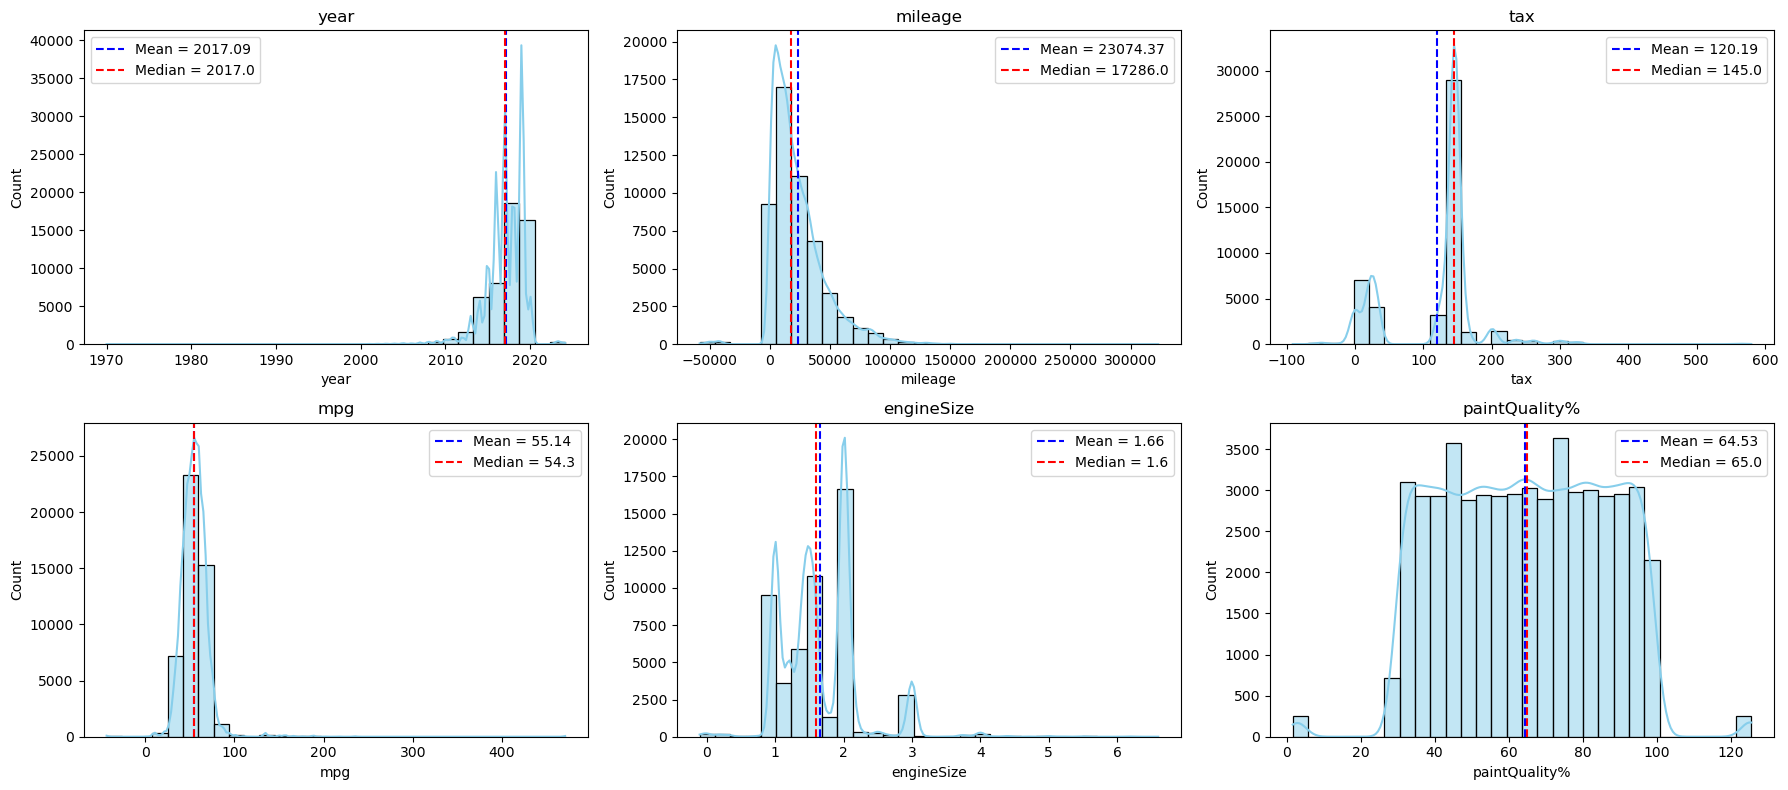

In [16]:
# Defining numerical features
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%']

# 3 plots per row
n_cols = 3
n_rows = math.ceil(len(numerical_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_features):

    sns.histplot(X_train[col], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(col)

    axes[i].axvline(X_train[col].mean(), color='blue', linestyle='--', label=f'Mean = {round(X_train[col].mean(), 2)}')
    axes[i].axvline(X_train[col].median(), color='red', linestyle='--', label=f'Median = {round(X_train[col].median(), 2)}')
    axes[i].legend()

# Hide unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

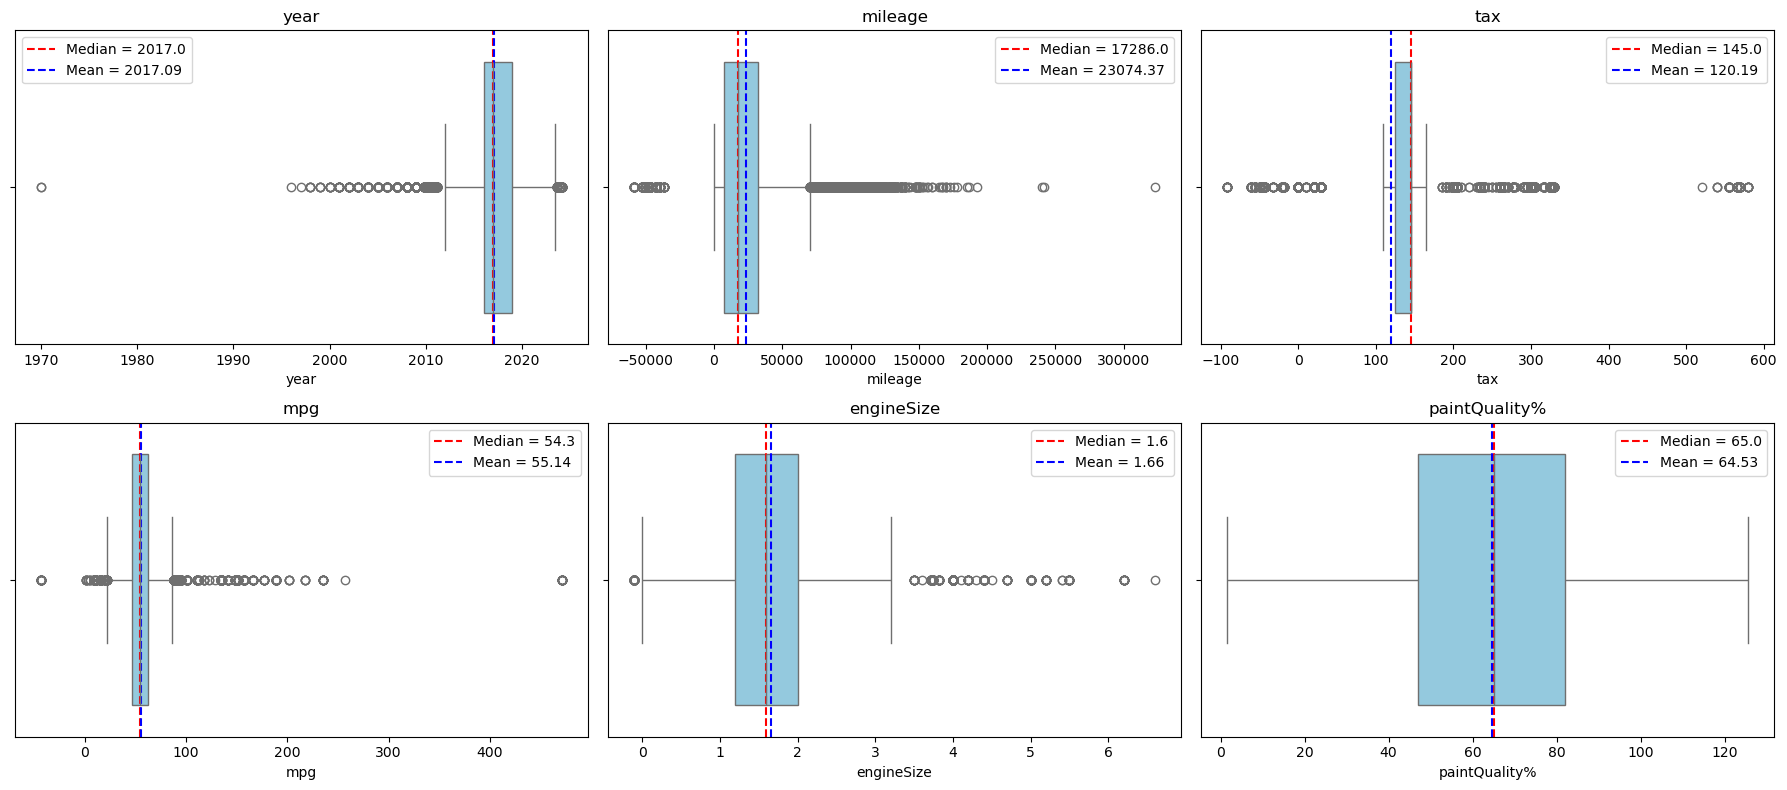

In [17]:
# 3 plots per line
n_cols = 3
n_rows = math.ceil(len(numerical_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x=X_train[col], color='skyblue', ax=axes[i])
    axes[i].set_title(col)

    # Add mean & median
    median = round(X_train[col].median(), 2)
    mean = round(X_train[col].mean(), 2)
    axes[i].axvline(median, color='red', linestyle='--', label=f'Median = {median}')
    axes[i].axvline(mean, color='blue', linestyle='--', label=f'Mean = {mean}')
    axes[i].legend()

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

By analysing the numerical features distributions, we can draw 3 main conclusions:

* __Significant Skewness:__ We observe that some  numeric features exhibit a pronounced skewness. This imbalance can distort the assumptions and performance of our model. Moving forward, we recognize the necessity of implementing transformation techniques to correct these skewed distributions and achieve greater symmetry, leading to a more stable analysis.

* __Illogical Values:__ We have detected clear nonsensical values (i.e., negative entries) within key features such as mileage, tax, and previousOwners. These values compromise the integrity of the dataset. Our immediate plan is to treat these illogical entries as missing data points, and implement an imputation strategy to ensure we recover and use the remaining valid information effectively.

* __Presence of Outliers:__ The distributions are characterized by long, heavy tails, confirming the pervasive presence of outliers in features like mileage and engineSize. These extreme values can influence any calculation based on means or variances. Consequently, we must ensure our preprocessing methods are robust to these outliers, thereby preventing them from destabilizing our feature standardization and subsequent model training.

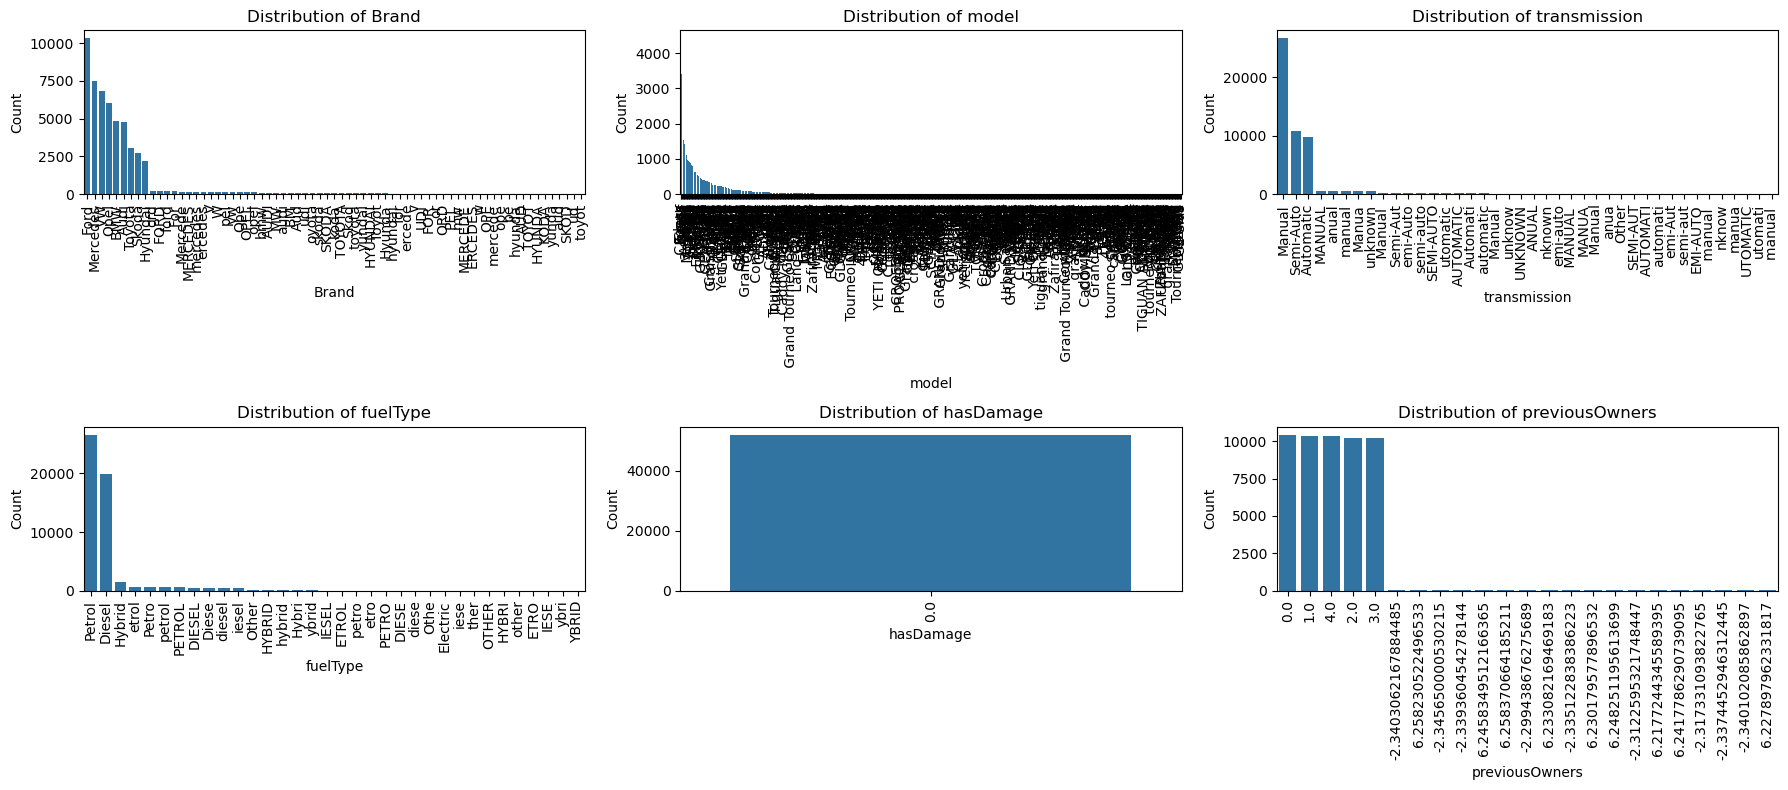

In [18]:
# Defining categorical features
categorical_features = ['Brand', 'model', 'transmission', 'fuelType', 'hasDamage','previousOwners']

# 3 plots per row
n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=X_train[col], order=X_train[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Additionally, our review of the categorical feature distributions and unique values verification reveals two major challenges:

* __Inconsistent Labeling and Typos:__ We observe a significant lack of standardization across categorical features. The same conceptual category is often represented by multiple, minor variations in casing (e.g., 'Petrol' vs. 'petrol') or minor typographical errors. This needs to be addressed in the data cleaning section, ensuring that unique categories are correctly identified.

* __High Cardinality:__ The features model and Brand exhibit a very high number of unique labels. Since this number is expected to decrease once we address the typos in these features' categories, we need to reassess this issue after the data cleaning section, consider the impact of this issue on enconding and define dimmensionality strategies if need be.

## 5 - Data Cleaning

Our initial data inspection in Section 3 revealed several data quality issues - specifically: typos in categorical values, physically impossible negative values in columns that should only be positive, and missing values.

Therefore, our cleaning process will focus on:

* __Unique values__: We will check each categorical features' unique value and correct any typos/inconsistencies.

* __Illogical values:__ We will correct all impossible values (e.g., negative mileage) by converting them to NaN (Not a Number). This officially flags them as "missing."

* __Missing values:__ We will implement imputation strategies (such as Mode, Median and KNN) to fill in all the NaN values, creating a complete, clean dataset.




### 5.1 - Unique Values

#### 5.1.1 - `Brand`


In this step we will be adressing the unique values on our dataset's categorical features, as we already establoished that there are several typos and inconsistencies.

In [19]:
#Analyse typos in the Brand column
X_train['Brand'] = X_train['Brand'].str.lower().str.strip()
X_train['Brand'].unique()

array(['mercedes', 'ford', 'hyundai', 'vw', 'opel', 'audi', 'toyota',
       'oyota', 'bmw', 'ope', nan, 'skoda', 'ercedes', 'v', 'mw', 'udi',
       'ord', 'w', 'for', 'pel', 'skod', 'aud', 'toyot', 'mercede', 'bm',
       'hyunda', 'ud', 'koda', 'ercede', 'or', 'yundai', 'pe', 'yunda'],
      dtype=object)

In [20]:
# Normalize the names on the Brand column
X_train['Brand'] = X_train['Brand'].str.lower().str.strip()
X_val['Brand'] = X_val['Brand'].str.lower().str.strip()

# Deterministic dictionary the variants
brand_map = {
    #ford
    'for' : 'ford', 'ord' : 'ford', 'or' : 'ford',
    #mercedes
    'ercedes' : 'mercedes', 'mercede' : 'mercedes', 'ercede' : 'mercedes',
    #volkswagen
    'vw' : 'volkswagen', 'v' : 'volkswagen', 'w' : 'volkswagen', #we verified that all the models of "w" were volkswagen models, not bmw.
    #opel
    'ope' : 'opel', 'pel' : 'opel', 'pe' : 'opel',
    #bmw
    'mw' : 'bmw', 'bm' : 'bmw',
    #audi
    'aud' : 'audi', 'udi' : 'audi', 'ud' : 'audi',
    #toyota
    'oyota' : 'toyota', 'toyot' : 'toyota',
    #skoda
    'koda' : 'skoda', 'skod' : 'skoda', 'kod' : 'skoda',
    #hyundai
    'yundai' : 'hyundai', 'hyunda' : 'hyundai', 'yunda' : 'hyundai'
}

# Apply the mapping to correct the brand names
X_train['Brand'] = X_train['Brand'].replace(brand_map)
X_val['Brand'] = X_val['Brand'].replace(brand_map)

# Verify the changes
print(X_train['Brand'].unique())
print(X_train['Brand'].unique())

['mercedes' 'ford' 'hyundai' 'volkswagen' 'opel' 'audi' 'toyota' 'bmw' nan
 'skoda']
['mercedes' 'ford' 'hyundai' 'volkswagen' 'opel' 'audi' 'toyota' 'bmw' nan
 'skoda']


#### 5.1.2 - `transmission`


In [21]:
#Analyze the typos in the transmission column
X_train['transmission'] = X_train['transmission'].str.lower().str.strip()
print(X_train['transmission'].unique())

['semi-auto' 'automatic' 'manual' nan 'semi-aut' 'manua' 'unknown'
 'automati' 'anual' 'utomatic' 'nknown' 'emi-auto' 'other' 'anua' 'nknow'
 'unknow' 'emi-aut' 'utomati']


In [22]:
# Normalize the names on the transmission column
X_train['transmission'] = X_train['transmission'].str.lower().str.strip()
X_val['transmission'] = X_val['transmission'].str.lower().str.strip()

# Deterministic dictionary the variants
transmission_map = {
    'anual': 'manual',
    'semi-aut': 'semi-auto',
    'manua': 'manual',
    'emi-aut': 'semi-auto',
    'automati': 'automatic',
    'utomatic': 'automatic',
    'anua': 'manual',
    'emi-auto': 'semi-auto',
    'nknown': 'unknown',
    'utomati': 'automatic',
    'nknow': 'unknown',
    'unknow': 'unknown'
}

# Apply the mapping to correct the transmission types
X_train['transmission'] = X_train['transmission'].replace(transmission_map)
X_val['transmission'] = X_val['transmission'].replace(transmission_map)

# Verify the changes
print(X_val['transmission'].unique())
print(X_train['transmission'].unique())

['semi-auto' 'manual' nan 'automatic' 'unknown']
['semi-auto' 'automatic' 'manual' nan 'unknown' 'other']


#### 5.1.3 - `fuelType`


In [23]:
# Analyze the typos in the fuelType column
X_train['fuelType'] = X_train['fuelType'].str.lower().str.strip()
X_train['fuelType'].unique()

array(['diesel', 'petrol', 'etrol', 'hybrid', 'petro', 'diese', nan,
       'iesel', 'other', 'hybri', 'etro', 'ybrid', 'othe', 'electric',
       'iese', 'ther', 'ybri'], dtype=object)

In [24]:
# Normalize the names on the fuelType column
X_train['fuelType'] = X_train['fuelType'].str.lower().str.strip()
X_val['fuelType'] = X_val['fuelType'].str.lower().str.strip()

# Deterministic dictionary the variants
fueltype_map = {
    'etrol': 'petrol',
    'iesel': 'diesel',
    'diese': 'diesel',
    'petro': 'petrol',
    'ybri': 'hybrid',
    'hybri': 'hybrid',
    'ybrid': 'hybrid',
    'ther': 'other',
    'iese': 'diesel',
    'etro': 'petrol',
    'othe': 'other'
}

# Apply the mapping to correct the fuelType names
X_train['fuelType'] = X_train['fuelType'].replace(fueltype_map)
X_val['fuelType'] = X_val['fuelType'].replace(fueltype_map)

# Verify the changes
print(X_val['fuelType'].unique())
print(X_train['fuelType'].unique())

['diesel' 'petrol' nan 'hybrid' 'other']
['diesel' 'petrol' 'hybrid' nan 'other' 'electric']


#### 5.1.4 - `model`


In [25]:
# Analyze the typos in the model column
X_train['model'] = X_train['model'].str.lower().str.strip()
X_train['model'].unique()

array(['e class', 'focus', 'c class', 'ix20', 'gol', 'i10', 't-cross',
       'corsa', 'golf', 'a4', 'polo', 'tucson', 'kuga', 'corolla',
       'yaris', 'q3', 'a class', 'a1', 'a5', 'q5', 'gle class',
       '3 series', 'fiesta', 't-roc', 'insignia', 'glc class', 'x1',
       'astra', 'q2', 'aygo', 'c-max', 'q', '2 series', 'a3', 'touran',
       'tt', 'santa fe', 'c-hr', 'superb', 'edge', 's class', 'cl class',
       'ka+', 'octavia', 'arteon', 'fiest', 'x4', 'z4', nan, 'ecosport',
       'yeti outdoor', 'meriva', 'i20', 'hilux', 'x5', 'm4', 'cla class',
       '1 series', 'mokka x', 'focu', 'prius', 'x2', '4 series', 's4',
       'fabia', 'auris', 'galaxy', 'citigo', 'a6', 'rav4', 'passat',
       'c clas', 'grand c-max', 'adam', 'gla class', 'g class', 'zafira',
       'touareg', 'sharan', 'mokka', 'tiguan', 'ioniq', 'q7', 'viva',
       'x3', 'tiguan allspace', 'passa', 'b class', 'up', 'pol',
       'crossland x', 'cls class', 'slk', 'kodiaq', 'mondeo', '1 serie',
       'b-max'

In [26]:
# Normalize the names on the model column 
X_train['model'] = X_train['model'].str.lower().str.strip()
X_val['model'] = X_val['model'].str.lower().str.strip()

# Deterministic dictionary for obvious variants
model_map = {
    'a clas': 'a class',
    'c clas': 'c class',
    'e clas': 'e class',
    'gle clas': 'gle class',
    'gla clas': 'gla class',
    'cls clas': 'cls class',
    'glc clas': 'glc class',
    'x-clas': 'x-class',
    'yeti outdoo': 'yeti outdoor',
    'tigua': 'tiguan',
    't-ro': 't-roc',
    'tiguan allspac': 'tiguan allspace',
    'astr': 'astra',
    'fiest': 'fiesta',
    'insigni': 'insignia',
    'octavi': 'octavia',
    'monde': 'mondeo',
    'passa': 'passat',
    'c clas': 'c class',
    'edg': 'edge',
    'mokk': 'mokka',
    'b clas': 'b class',
    'v clas': 'v class',
    'gls clas': 'gls class',
    'm clas': 'm class',
    'sl clas': 'sl class',
    'cl clas': 'cl class',
    'combo lif': 'combo life',
    'caddy maxi lif': 'caddy maxi life',
    'c-ma': 'c-max',
    'b-ma': 'b-max',
    'grand c-ma': 'grand c-max',
    'arteo': 'arteon',
    'aur': 'auris',
    'fabi': 'fabia',
    'ayg': 'aygo',
    'gol': 'golf',
    'coroll': 'corolla',
    'zafir': 'zafira',
    'tourneo custo': 'tourneo custom',
    'grand tourneo connec': 'grand tourneo connect',
    'edg' : 'edge'
}

# Apply the mapping to correct the transmission types
X_train['model'] = X_train['model'].replace(model_map)
X_val['model'] = X_val['model'].replace(model_map)

# Verify the changes                                             
print(X_train['model'].unique())
print(X_val['model'].unique())

['e class' 'focus' 'c class' 'ix20' 'golf' 'i10' 't-cross' 'corsa' 'a4'
 'polo' 'tucson' 'kuga' 'corolla' 'yaris' 'q3' 'a class' 'a1' 'a5' 'q5'
 'gle class' '3 series' 'fiesta' 't-roc' 'insignia' 'glc class' 'x1'
 'astra' 'q2' 'aygo' 'c-max' 'q' '2 series' 'a3' 'touran' 'tt' 'santa fe'
 'c-hr' 'superb' 'edge' 's class' 'cl class' 'ka+' 'octavia' 'arteon' 'x4'
 'z4' nan 'ecosport' 'yeti outdoor' 'meriva' 'i20' 'hilux' 'x5' 'm4'
 'cla class' '1 series' 'mokka x' 'focu' 'prius' 'x2' '4 series' 's4'
 'fabia' 'auris' 'galaxy' 'citigo' 'a6' 'rav4' 'passat' 'grand c-max'
 'adam' 'gla class' 'g class' 'zafira' 'touareg' 'sharan' 'mokka' 'tiguan'
 'ioniq' 'q7' 'viva' 'x3' 'tiguan allspace' 'b class' 'up' 'pol'
 'crossland x' 'cls class' 'slk' 'kodiaq' 'mondeo' '1 serie' 'b-max'
 'caddy life' 'sl class' 'a7' 'a' 'i30' 'yeti' 'grandland x'
 'tourneo custom' 'antara' 'avensis' 'x6' '5 series' 'gl class' 'ix35'
 'kamiq' 'ka' 'caravelle' 'karoq' 'scala' 'v class' 'golf sv' 'verso'
 'tucso' 'kona' '7

### 5.2 - Ilogical Values

As said before,  on our initial inspection, we identified impossible negative values in several numerical columns such as:

* `mileage`
* `tax`
* `mpg`
* `engineSize`
* `previousOwners`


These are not outliers: they are data entry errors. A car cannot have negative owners, negative mileage, or a negative tax.

Therefore we will assume these values are unknown. We will write a function to convert any value less than 0 in these specific columns to nan (Not a Number).

In [27]:
#Checking if the columns mentioned above have negative values and, if so, converting them to NaN

# Converting all the neagtives that don't make sense into missing values

X_train['mileage'] = X_train['mileage'].apply(
    lambda x: np.nan if pd.notnull(x) and isinstance(x, (int, float)) and x < 0 else x
)

X_val['mileage'] = X_val['mileage'].apply(
    lambda x: np.nan if pd.notnull(x) and isinstance(x, (int, float)) and x < 0 else x
)

X_train['tax'] = X_train['tax'].apply(
    lambda x: np.nan if pd.notnull(x) and isinstance(x, (int, float)) and x < 0 else x
)

X_val['tax'] = X_val['tax'].apply(
    lambda x: np.nan if pd.notnull(x) and isinstance(x, (int, float)) and x < 0 else x
)

X_train['mpg'] = X_train['mpg'].apply(
    lambda x: np.nan if pd.notnull(x) and isinstance(x, (int, float)) and x < 0 else x
)

X_val['mpg'] = X_val['mpg'].apply(
    lambda x: np.nan if pd.notnull(x) and isinstance(x, (int, float)) and x < 0 else x
)

X_train['engineSize'] = X_train['engineSize'].apply(
    lambda x: np.nan if pd.notnull(x) and isinstance(x, (int, float)) and x < 0 else x
)

X_val['engineSize'] = X_val['engineSize'].apply(
    lambda x: np.nan if pd.notnull(x) and isinstance(x, (int, float)) and x < 0 else x
)

X_train['previousOwners'] = X_train['previousOwners'].apply(
    lambda x: np.nan if pd.notnull(x) and isinstance(x, (int, float)) and x < 0 else x
)

X_val['previousOwners'] = X_val['previousOwners'].apply(
    lambda x: np.nan if pd.notnull(x) and isinstance(x, (int, float)) and x < 0 else x
)

Additionally, we've observed that the `year` feature is showing float values (e.g., 2022.878) instead of clean integers. We will correct this by rounding all values in the year column to the nearest whole number and converting the column to an integer type.

In [28]:
# Round the 'year' to the nearest integer
X_train['year'] = np.round(X_train['year'])
X_val['year'] = np.round(X_val['year'])

# Convert to integer type
X_train['year'] = X_train['year'].astype('Int64')
X_val['year'] = X_val['year'].astype('Int64')

The negative values in `previousOwners` were removed, but there are still illogical values in this feature. It doesn't make any sense to have floats as the number of `previousOwners`. The best way to deal with this is treating these float numbers as missing values.

In [29]:
X_train.loc[X_train['previousOwners'] % 1 != 0, 'previousOwners'] = np.nan
X_train['previousOwners'] = X_train['previousOwners'].astype('Int64')

X_val.loc[X_val['previousOwners'] % 1 != 0, 'previousOwners'] = np.nan
X_val['previousOwners'] = X_val['previousOwners'].astype('Int64')

print(X_train['previousOwners'].unique())
print(X_val['previousOwners'].unique())

<IntegerArray>
[3, 2, 4, 0, <NA>, 1]
Length: 6, dtype: Int64
<IntegerArray>
[0, 1, <NA>, 3, 2, 4]
Length: 6, dtype: Int64


Now that all the ilogical values have been converted to NaN, we can handle and correct them as such.

### 5.3- Missing Values

Following step 3.1, our dataset now contains NaN values that are either original or a result of cleaning illogical data.

That being said, we will now select the best method for handling each column's missing value. 

For that, we will consider their data type (categorical/numerical), skewness, and percentage of missing values:

* __Numerical features (Low % Missing & Skewed):__ Impute with the Median (robust to outliers).

* __Numerical features (High % Missing & Correlated):__ Impute with KNNImputer (uses other features for an intelligent estimate).

* __Categorical features (Low % Missing)__: Impute with the Mode (most frequent value).

Crucially, to prevent data leakage, all values (modes, medians, or KNN/Scaler models) will be "fit" on the train_data only and then used to "transform" both train_data and test_data.

The first step is to get a summary of all missing values:

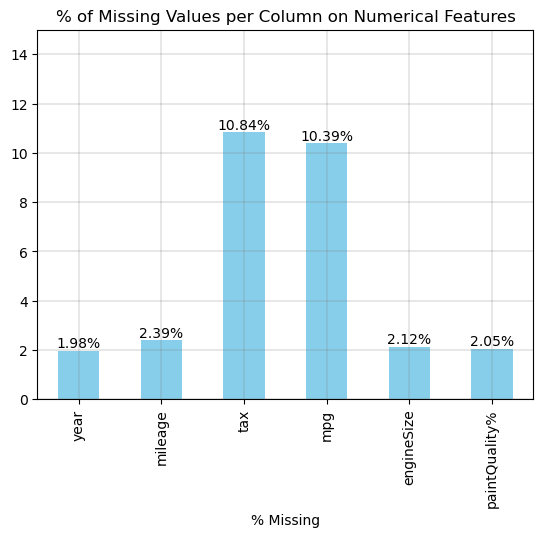

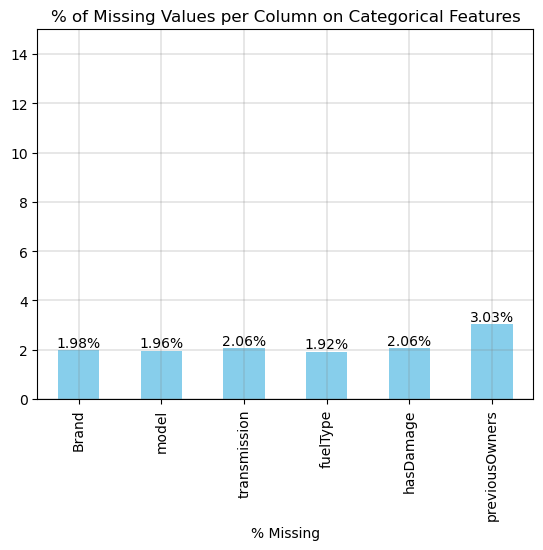

In [30]:
# Plotting the missing values % of the numerical variables
missing = (X_train[numerical_features].isna().sum() / X_train.shape[0]) * 100

plot = missing.plot(kind='bar', color='skyblue')
plt.grid(color='gray', linewidth=0.3, alpha=0.9)
plt.title('% of Missing Values per Column on Numerical Features')
plt.xlabel('% Missing')
plt.ylim(0,15)

# Showing the % of each bar
for i, value in enumerate(missing):
    plot.text(i, value + 0.01, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

# Plotting the missing values % of the categorical variables
missing = (X_train[categorical_features].isna().sum() / X_train.shape[0]) * 100

plot = missing.plot(kind='bar', color='skyblue')
plt.grid(color='gray', linewidth=0.3, alpha=0.9)
plt.title('% of Missing Values per Column on Categorical Features')
plt.xlabel('% Missing')
plt.ylim(0,15)

# Showing the % of each bar
for i, value in enumerate(missing):
    plot.text(i, value + 0.01, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

As seen in the plots, the `price` is the only feature without missing values. `tax` and `mpg` have around 10% of missing values, while all the other numeric features have around 2% of missing values. 

By analyzing the plotted distributions on section 3, we can understand how the missing values should be filled.

#### 5.3.1 - Numerical features - Median imputation

__Features:__ `year`, `mileage`, `engineSize`
As we verified on section 3, these features are considerably skewed, contain a high number of outliers and a relatively small percentage of missing values (around 2%). Therefore, the most robust way of filling it's missing values is with the median.

In [31]:
# Select the columns to impute with the median
cols_median = ['year', 'mileage', 'engineSize']

# Compute the median for each of these columns (NaN values are ignored automatically)
medians = X_train[cols_median].median()

# Replace missing values with the respective median
for col in cols_median:
    X_train[col].fillna(medians[col], inplace=True)
    X_val[col].fillna(medians[col], inplace=True)

#### 5.3.2 - Numerical features - KNN imputation

__Features:__ `tax`, `mpg`
Since these features have a higher percentage of missing values (~10%), imputing them with the median could distort our dataset. By using KNN we can achieve a much more accurate, context-aware imputation.

However, we first need to make sure that there is a strong correlation between these features and other numerical features. For that, we will create a correlation heatmap:

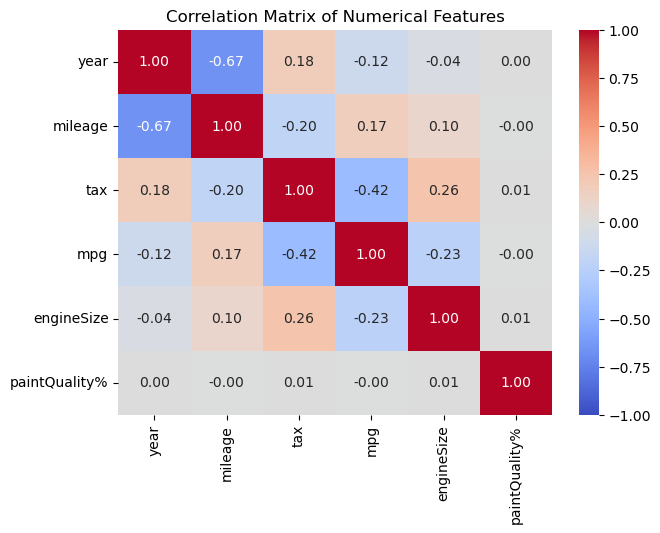

In [32]:
# Select only numeric columns from your DataFrame
numerical_data = train_data[numerical_features]

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Plot using a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Analysing the heatmap above we can conclude that:

* There is a __moderate postive correlation__ between `tax` and `engineSize`
* There is a __moderate negative correlation__ between `mpg` and `engineSize`
* There is a __strong negative correlation__ between `tax` and `mpg`

These correlations, while not perfect, are statistically significant and confirm that the variables are interconnected.
Therefore, using KNN leverages these relationships to make for a much more accurate prediction for the missing values. It will use the engineSize to help predict both the tax and the mpg.


In [33]:
# Numerical features for KNN
numerical_cols_for_knn = [
    'year', 
    'mileage', 
    'engineSize', 
    'tax', # target
     'mpg' # target
     ] 

# Creating a temporary DataFrame using only these columns
X_train_knn = X_train[numerical_cols_for_knn].copy()
X_val_knn = X_val[numerical_cols_for_knn].copy()

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_knn)
X_val_scaled = scaler.transform(X_val_knn)

# Applying KNN Imputer
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_val_imputed = imputer.transform(X_val_scaled)

# Returning the data to its original scale.
X_train_knn_imputed = scaler.inverse_transform(X_train_imputed)
X_val_knn_imputed = scaler.inverse_transform(X_val_imputed)

# Updating 'tax' and 'mpg' in the original DataFrame
X_train.loc[:, 'tax'] = X_train_knn_imputed[:, numerical_cols_for_knn.index('tax')]
X_train.loc[:, 'mpg'] = X_train_knn_imputed[:, numerical_cols_for_knn.index('mpg')]
X_val.loc[:, 'tax'] = X_val_knn_imputed[:, numerical_cols_for_knn.index('tax')]
X_val.loc[:, 'mpg'] = X_val_knn_imputed[:, numerical_cols_for_knn.index('mpg')]

#### 5.3.3 - Numerical features - Random Sampling Imputation

We tried to use the median and mean to replace the missing values in **paintQuality%**, but it changed the distribution significantly. Also, KNN is not a good way to fill the missing values because this feature is not correlated with any other features. Therefore why we decided to fill the missing values of this feature with a random sampling Imputation.

In [34]:
def sample_impute(col, X_train, X_val):
    mask_train = X_train[col].isna()
    mask_val = X_val[col].isna()
    observed = X_train.loc[~mask_train, col]

    X_train.loc[mask_train, col] = np.random.choice(observed, size=mask_train.sum(), replace=True)
    X_val.loc[mask_val, col] = np.random.choice(observed, size=mask_val.sum(), replace=True)

sample_impute('paintQuality%', X_train, X_val)

#### 5.3.4 - Categorical features - Median imputation

__Features:__ `previousOwners`

This feature is a skewed count variable. We chose the median over the mean because it is robust to outliers (the long tail of cars with many owners). The median provides a "typical," representative, and physically realistic integer value.


In [35]:
X_train['previousOwners'] = X_train['previousOwners'].fillna(X_train['previousOwners'].mode()[0])
X_val['previousOwners'] = X_val['previousOwners'].fillna(X_train['previousOwners'].mode()[0])

#### 5.3.5 - Categorical features - Imputation as new category

__Features:__ `Brand`, `model`, `transmission`, `fuelType`

We assume the data from these features might be Missing Not At Random (MNAR).

Instead of just using the mode (most frequent value), we are going to create a distinct new category called 'unknown'. This allows our model to learn if this "unknown" group has a consistently higher or lower price, effectively treating "missingness" as its own predictive feature.

In [36]:
for col in ['Brand', 'model', 'transmission', 'fuelType']:
    X_train[col] = X_train[col].fillna('unknown')
    X_val[col] = X_val[col].fillna('unknown')

#### 5.3.6 - Categorical features - Zero imputation

__Features:__ `hasDamage`

This is a binary categorical feature where 0 means "No Damage" and 1 means "Has Damage." The vast majority of cars in our dataset have no damage, making 0 the mode (the most frequent value). Our imputation makes the logical that a missing value is far more likely to mean "no damage" (0) than "damage" (1).

In [37]:
X_train['hasDamage'] = X_train['hasDamage'].fillna(0)
X_val['hasDamage'] = X_val['hasDamage'].fillna(0)

## 7 - Target Variable Analysis (price)

Before moving forward to our main EDA, we must first understand the variable we are trying to predict: `price`. The distribution of the target variable will directly infuence our choice of model, our transformation strategy, and the metric we use for evaluation.

Our primary goal here is to check for skewness and outliers. Most standard regression models (like Linear Regression) perform best when the target variable (or, more accurately, the residuals of the model) is normally distributed. A highly skewed target variable can cause the model to be biased by extreme values.

#### 7.1.1 - Price distribution

We need to visualize the distribution of price to check its shape, for what we'll use a histogram and overlay the mean and median to clearly see the skew.

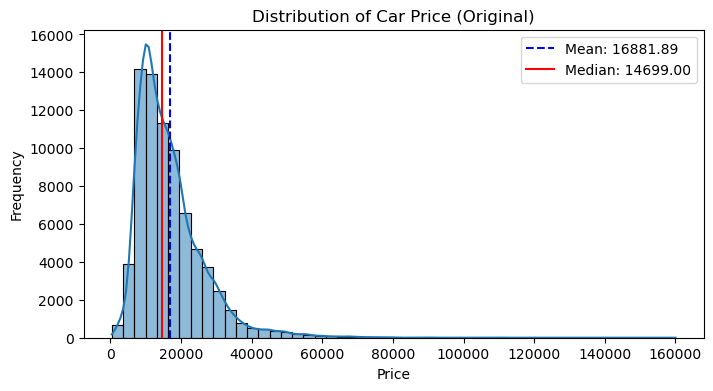

In [38]:
#Analyzing 'price' distribution
plt.figure(figsize=(8, 4))
sns.histplot(train_data['price'], bins=50, kde=True)

# Adding lines for mean and median
plt.axvline(train_data['price'].mean(), color='blue', linestyle='--', label=f"Mean: {train_data['price'].mean():.2f}")
plt.axvline(train_data['price'].median(), color='red', linestyle='-', label=f"Median: {train_data['price'].median():.2f}")

# Plot adjustments
plt.title('Distribution of Car Price (Original)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As the plot clearly shows, the price variable is severely right-skewed:

* __Long Tail:__ There is a long tail of very expensive, high-value cars.

* __Mean vs. Median:__ The mean price is significantly higher than the median price. This is an indicator of right-skewness, as the mean is being "pulled" upwards by the expensive outlier cars.

Since linear models will perform poorly, and our predictions will be highly sensitive to these outliers, we need to apply a log transformation on price.

#### 7.1.2 - Log transformation

In order to correct the right-skewness detected in the previous point, we need to apply a logarithmic transformation. This will "compress" the long tail of high values and make the distribution  closer to a normal (bell) curve.

That being said, we will now create a new column (log_price) and plot its distribution.

Original y_train mean: 16862.74
Original y_val mean: 16926.57

Transformed y_train_log mean: 9.59
Transformed y_val_log mean: 9.60


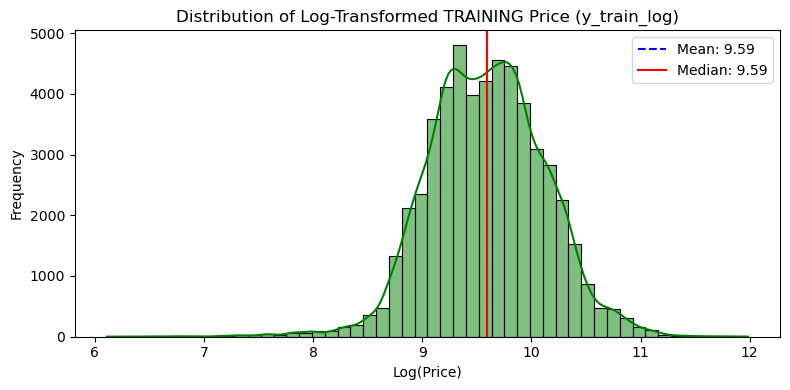

In [39]:
# Applying the log transformation o target feature (price)
print(f"Original y_train mean: {y_train.mean():.2f}")
print(f"Original y_val mean: {y_val.mean():.2f}")

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# Rename the series for clarity
y_train_log.name = "log_price"
y_val_log.name = "log_price"

print(f"\nTransformed y_train_log mean: {y_train_log.mean():.2f}")
print(f"Transformed y_val_log mean: {y_val_log.mean():.2f}")


# Plotting
plt.figure(figsize=(8, 4))
sns.histplot(y_train_log, bins=50, kde=True, color='green')

# Add mean and median lines
mean_val = y_train_log.mean()
median_val = y_train_log.median()
plt.axvline(mean_val, color='blue', linestyle='--', label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color='red', linestyle='-', label=f"Median: {median_val:.2f}")

plt.title('Distribution of Log-Transformed TRAINING Price (y_train_log)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()

By applying a log transformation, we successfully normalized the target variable. This new variable is symmetrically distributed, with its mean and median now aligned.

This is critical because:

* __Reduces Outlier Influence:__ It prevents a few extremely expensive cars from dominating the model's training, leading to a more accurate model for the majority of cars.

* __Improves Model Stability:__ It creates a more "normal" error distribution, which satisfies the core assumptions of linear models and makes their predictions more reliable.

* __Lowers Error:__ It compresses the scale, which significantly reduces the massive penalties from a few bad predictions on expensive cars, leading to a much better overall error score.

## 8 - EDA (Exploratory Data Analysis)

### 8.1 - Numerical Feature Analysis

Now that we have analyzed our target variable price, we must do the same for our predictor features. This analysis has two goals:

* __Univariate Analysis:__ Understand the distribution, skew, and outliers of each feature individually. This substantiates our imputation and scaling strategies.

* __Multivariate Analysis:__ Understand how the features relate to each other and to our target variable log_price. This is relevant for feature selection.

#### 8.1.1 - Univariate Analysis : Feature Distributions

In this section, we will examine each feature in the dataset in isolation, without regard to other variables or the target (price).

The primary goals of this analysis are:

* __Understand Feature Characteristics:__ To assess the central tendency (mean, median), dispersion (standard deviation, range), and the overall shape of the distribution for every numeric feature.

* __Diagnose Data Quality:__ To visually confirm the issues identified in our preliminary checks, specifically the degree of skewness, the presence of outliers, and any remaining inconsistencies or illogical values within individual columns.

* __Inform Preprocessing:__ The results of the univariate analysis (particularly the distribution plots) will serve as the direct, data-driven evidence necessary to justify our detailed steps for feature transformation, cleaning, and encoding.

By systematically examining each variable, we ensure that our approach to cleaning and preprocessing is adequate to our dataset.

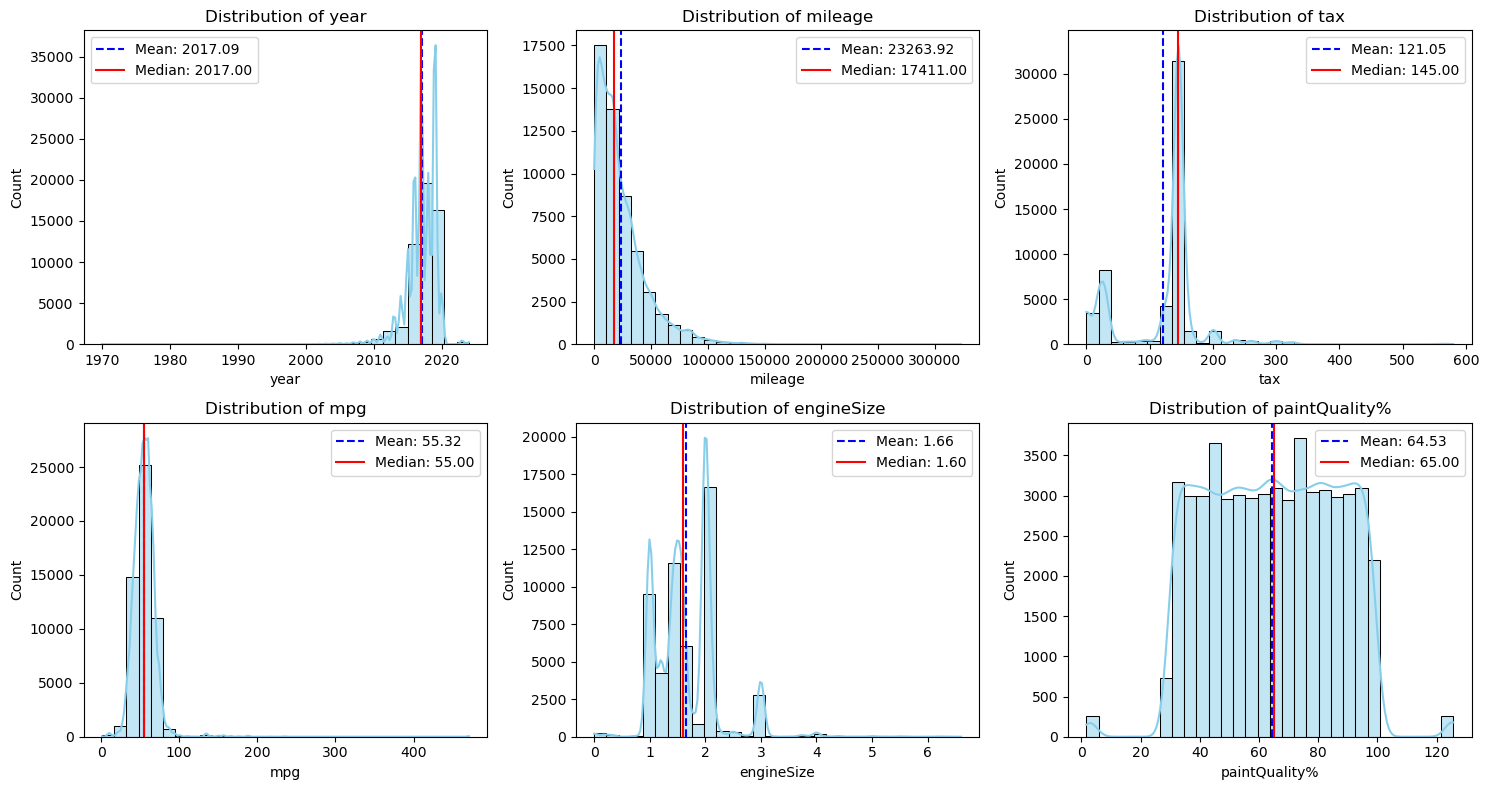

In [40]:
# Plotting Numerical Feature Distributions

n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(numerical_features):
    ax = axes[i]
    sns.histplot(X_train[col], bins=30, kde=True, ax=ax, color='skyblue')
    
    mean_val = X_train[col].mean()
    median_val = X_train[col].median()
    
    ax.axvline(mean_val, color='blue', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='red', linestyle='-', label=f'Median: {median_val:.2f}')
    
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.legend()

# Hiding any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

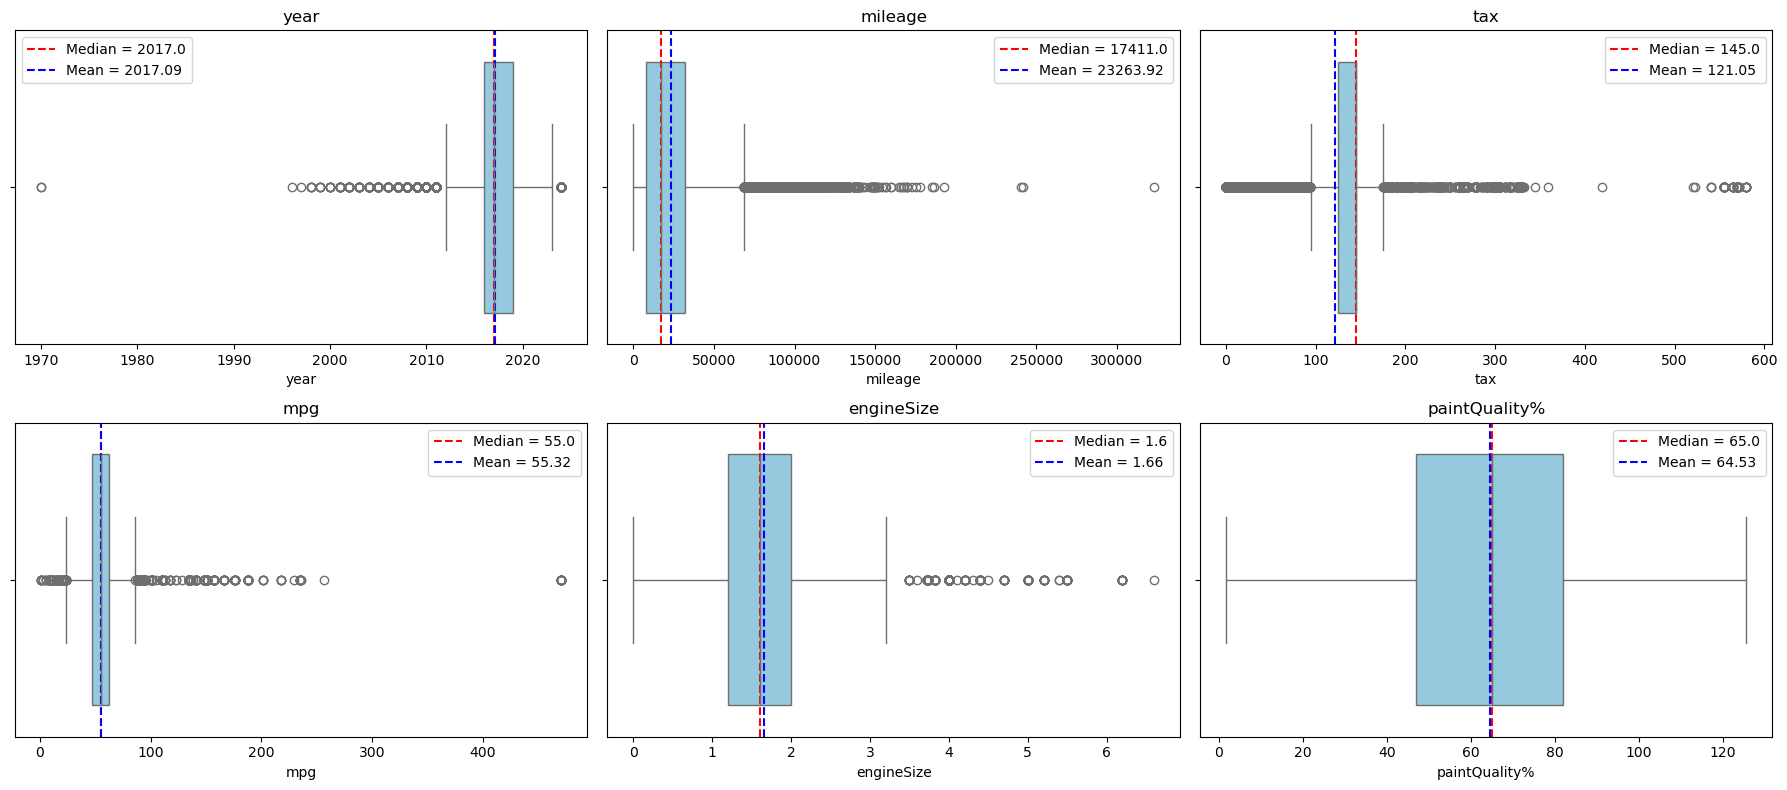

In [41]:
# 3 plots per line
n_cols = 3
n_rows = math.ceil(len(numerical_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x=X_train[col], color='skyblue', ax=axes[i])
    axes[i].set_title(col)

    # Add mean & median
    median = round(X_train[col].median(), 2)
    mean = round(X_train[col].mean(), 2)
    axes[i].axvline(median, color='red', linestyle='--', label=f'Median = {median}')
    axes[i].axvline(mean, color='blue', linestyle='--', label=f'Mean = {mean}')
    axes[i].legend()

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

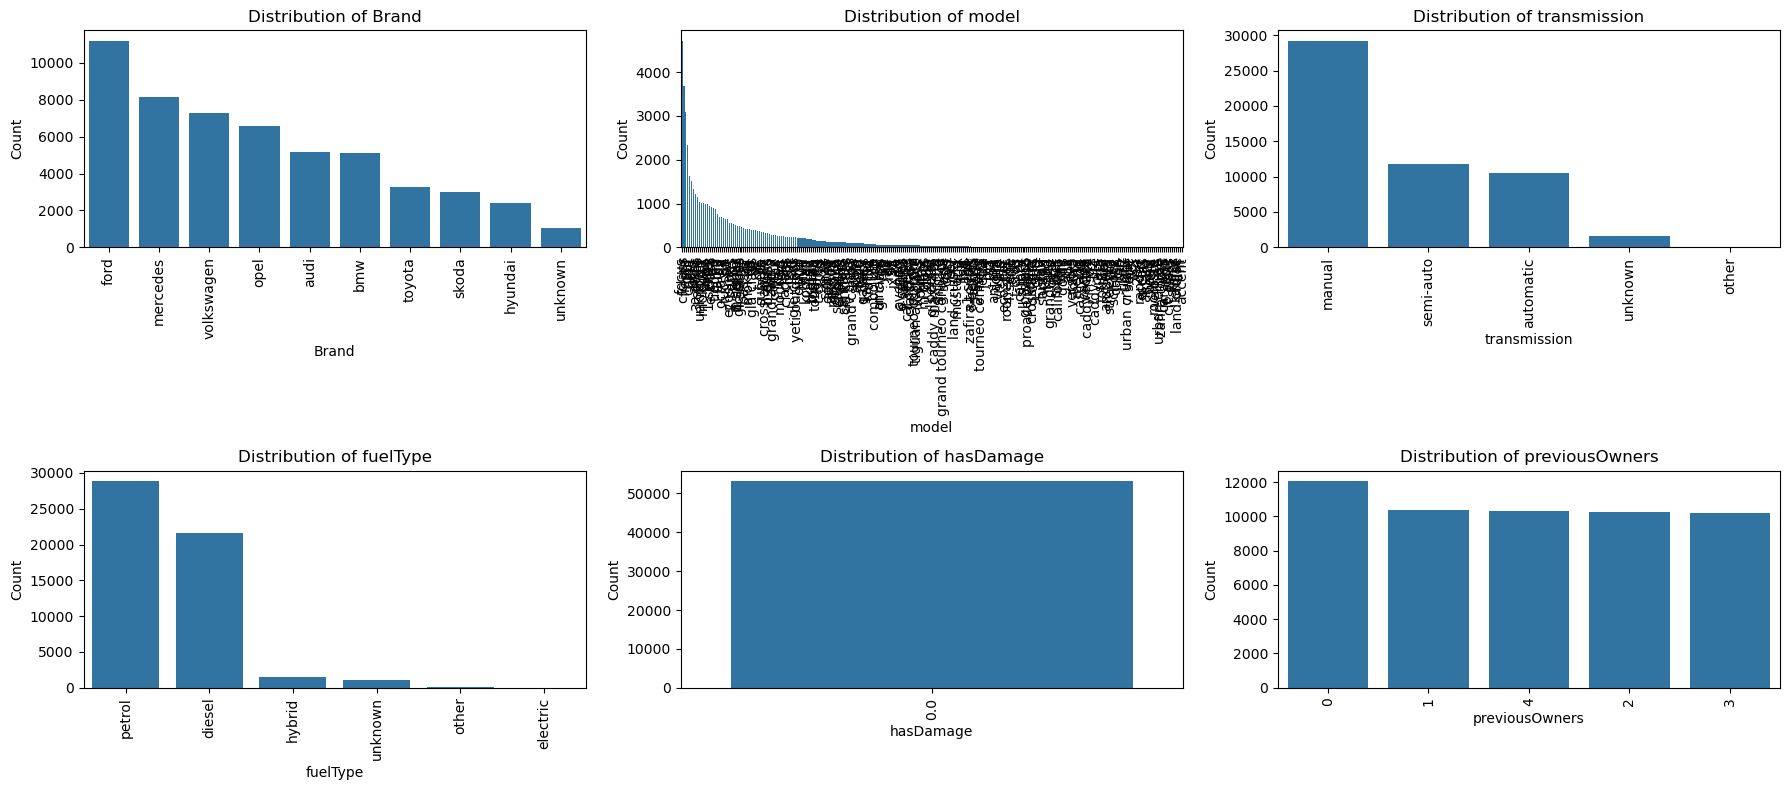

In [42]:
# Defining categorical features
categorical_features = ['Brand', 'model', 'transmission', 'fuelType', 'hasDamage','previousOwners']

# 3 plots per row
n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=X_train[col], order=X_train[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [43]:
print('Train')
print(X_train.isna().sum())
print('\n')
print('Validation')
print(X_val.isna().sum())

Train
Brand             0
model             0
year              0
transmission      0
mileage           0
fuelType          0
tax               0
mpg               0
engineSize        0
paintQuality%     0
previousOwners    0
hasDamage         0
dtype: int64


Validation
Brand             0
model             0
year              0
transmission      0
mileage           0
fuelType          0
tax               0
mpg               0
engineSize        0
paintQuality%     0
previousOwners    0
hasDamage         0
dtype: int64


From the plots shown above, we can see that the distributions have not been significantly altered during our data cleaning process - this gives us confort in our imputation and cleaning methods. 

Additionally, we can also verify that the typos on the categorical values and the missing values have now been corrected.

However, there are still 3 major points that we need to consider:

* __Skewness problem:__ some key numeric predictors  still exhibit a considerable skewness and a heavy concentration of outliers. This non-normality is incompatible with the assumptions of our planned linear model. We must implement transformations on these skewed variables to normalize their distributions and ensure a more stable, linear relationship for the model to capture.

* __Feature Engineering is Crucial for Predictive Power:__ To accurately model the economic factor of car ownership, we must move beyond the raw features. We recognize the need to create the age variable from year to directly quantify depreciation. Furthermore, exploring new variables, such as mileage per year, will enhance the model's ability to assess vehicle usage intensity.

* __Dimensionality Management for Stability:__ With categorical features now standardized, the high number of unique entries in the model feature remains the primary structural challenge. To prevent feature explosion and model instability, we must finalize a strategy for dimensionality reduction. This involves techniques like grouping rare labels to efficiently encode categorical information without creating hundreds of sparse columns, thus preparing a clean, optimized feature matrix for feature selection.



#### 8.1.2 - Multivariate Analysis

In this section, we will explore the interactions between the predictor variables and the target variable (price), as well as the relationships among the predictors themselves.

The primary objectives of this multivariate exploration are:

* __Establish Predictive Relationships:__ To visually and statistically confirm the functional form of the relationship between our clean, engineered predictors and the log-transformed price. 

* __Identify Feature Importance:__ To assess how different levels of categorical features impact the central tendency and variance of the price.

* __Detect Multicollinearity:__ To quantify the correlation between our continuous predictor variables. Identifying features that are highly correlated is vital, as it will inform our subsequent feature selection strategy by helping us decide which highly redundant features to retain or drop.

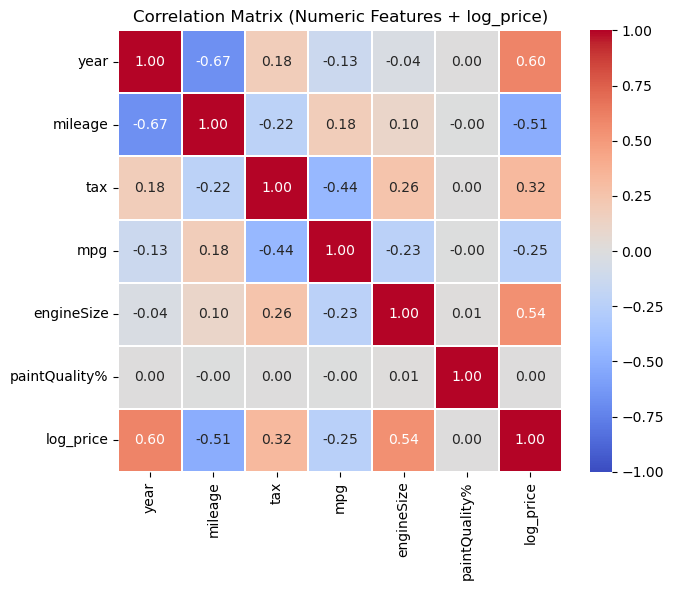

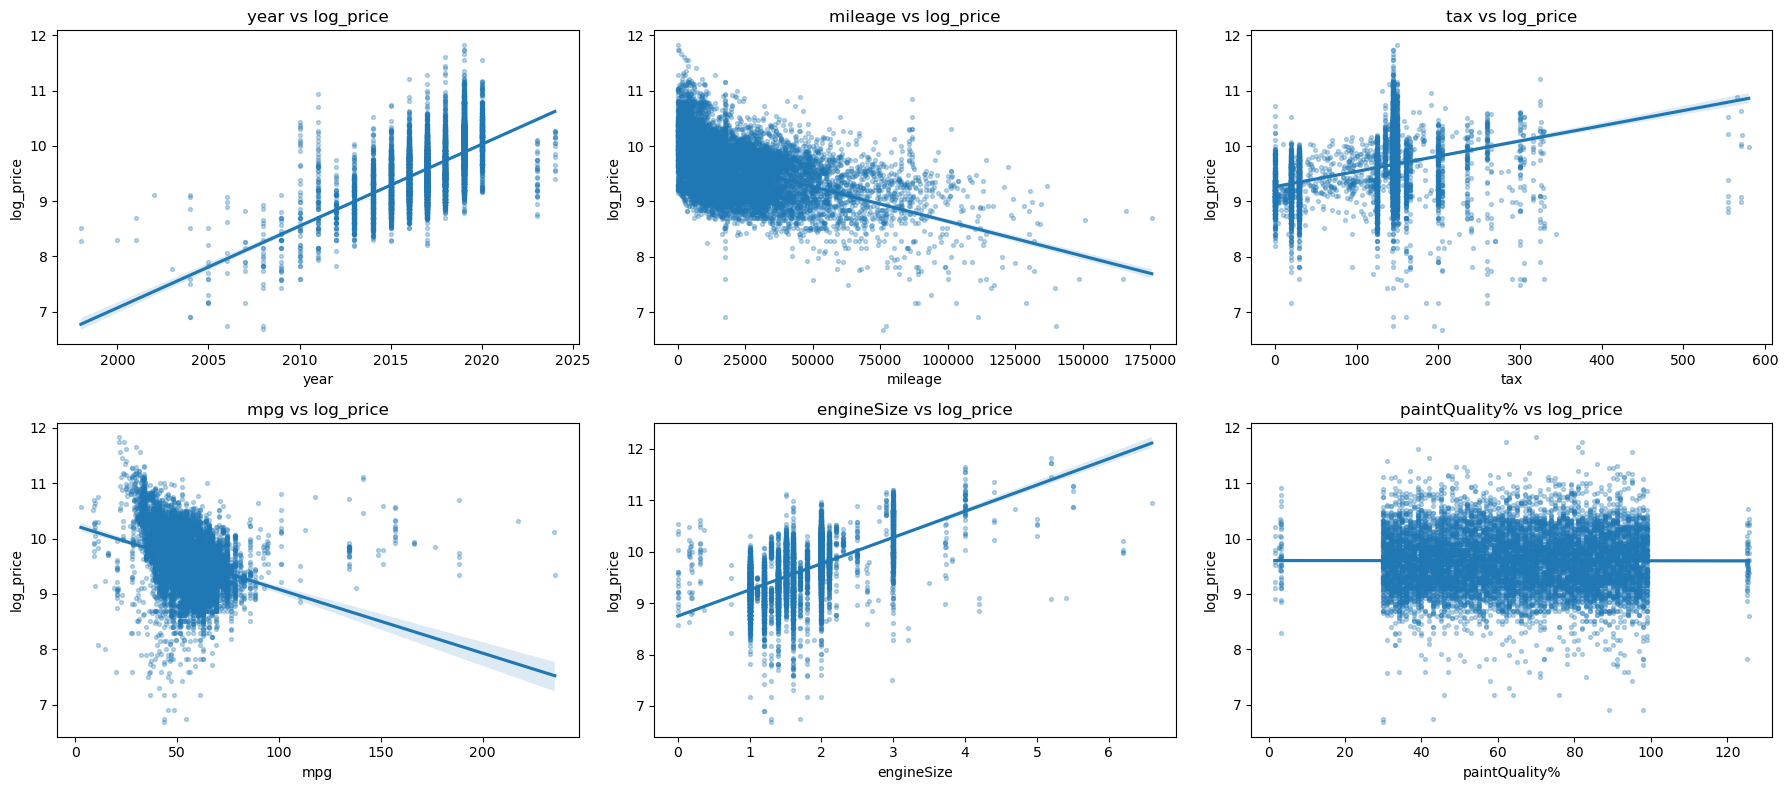

In [44]:
# Configuration & Validation

assert 'log_price' in y_train_log.name, "Error: y_train_log must be named 'log_price'." 

# Define features
num_feats_mv = list(dict.fromkeys(
    (numerical_features if 'numerical_features' in globals() else []) +
    ['age', 'mileage_per_year']
))
# Filter for existing columns only.
num_feats_mv = [c for c in num_feats_mv if c in X_train.columns]  


# Correlation Matrix (Pearson)
df_num = X_train[num_feats_mv].copy()
df_num['log_price'] = y_train_log.values

plt.figure(figsize=(0.9*len(df_num.columns)*1.1, 6))
corr = df_num.corr(method='pearson') # Calculate linear correlation coefficients.
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="coolwarm", linewidths=0.3)
plt.title('Correlation Matrix (Numeric Features + log_price)')
plt.tight_layout()
plt.show()


# Scatter + Regression Line
ncols = 3
nrows = math.ceil(len(num_feats_mv)/ncols) # Dynamic grid layout calculation.
fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows))
axes = axes.flatten()

plot_df = X_train[num_feats_mv].copy()
plot_df['log_price'] = y_train_log.values

# Performance Optimization: Sample data if exceeding 10,000 observations.
if len(plot_df) > 10000:
    plot_df = plot_df.sample(10000, random_state=RSEED) # RSEED must be defined.

for i, col in enumerate(num_feats_mv):
    ax = axes[i]
    # Regplot: Visualizes scatter distribution and linear trend (OLS).
    sns.regplot(data=plot_df, x=col, y='log_price', scatter_kws={'s':8, 'alpha':0.3}, ax=ax)
    ax.set_title(f'{col} vs log_price')

# Remove any unused subplot axes.
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The correlation matrix and scatterplots show clear patterns between the numeric variables and log_price: 

* Newer cars (year) tend to be more expensive, while older ones (age) lose value — both are almost perfectly inversely correlated, so it’s best not to use them together. 
* Higher mileage and mileage_per_year relate to lower prices, which aligns with wear and tear. 
* Cars with larger engineSize usually cost more, and tax also rises slightly with price, likely reflecting engine power or emissions. 
* MPG has a negative link, meaning more fuel-efficient cars are generally cheaper. 
* PaintQuality% barely varies with price, suggesting little predictive power.

Overall, the relationships make sense both statistically and economically: newer, larger-engine cars hold higher value, while age and usage remain the main factors pulling prices down.

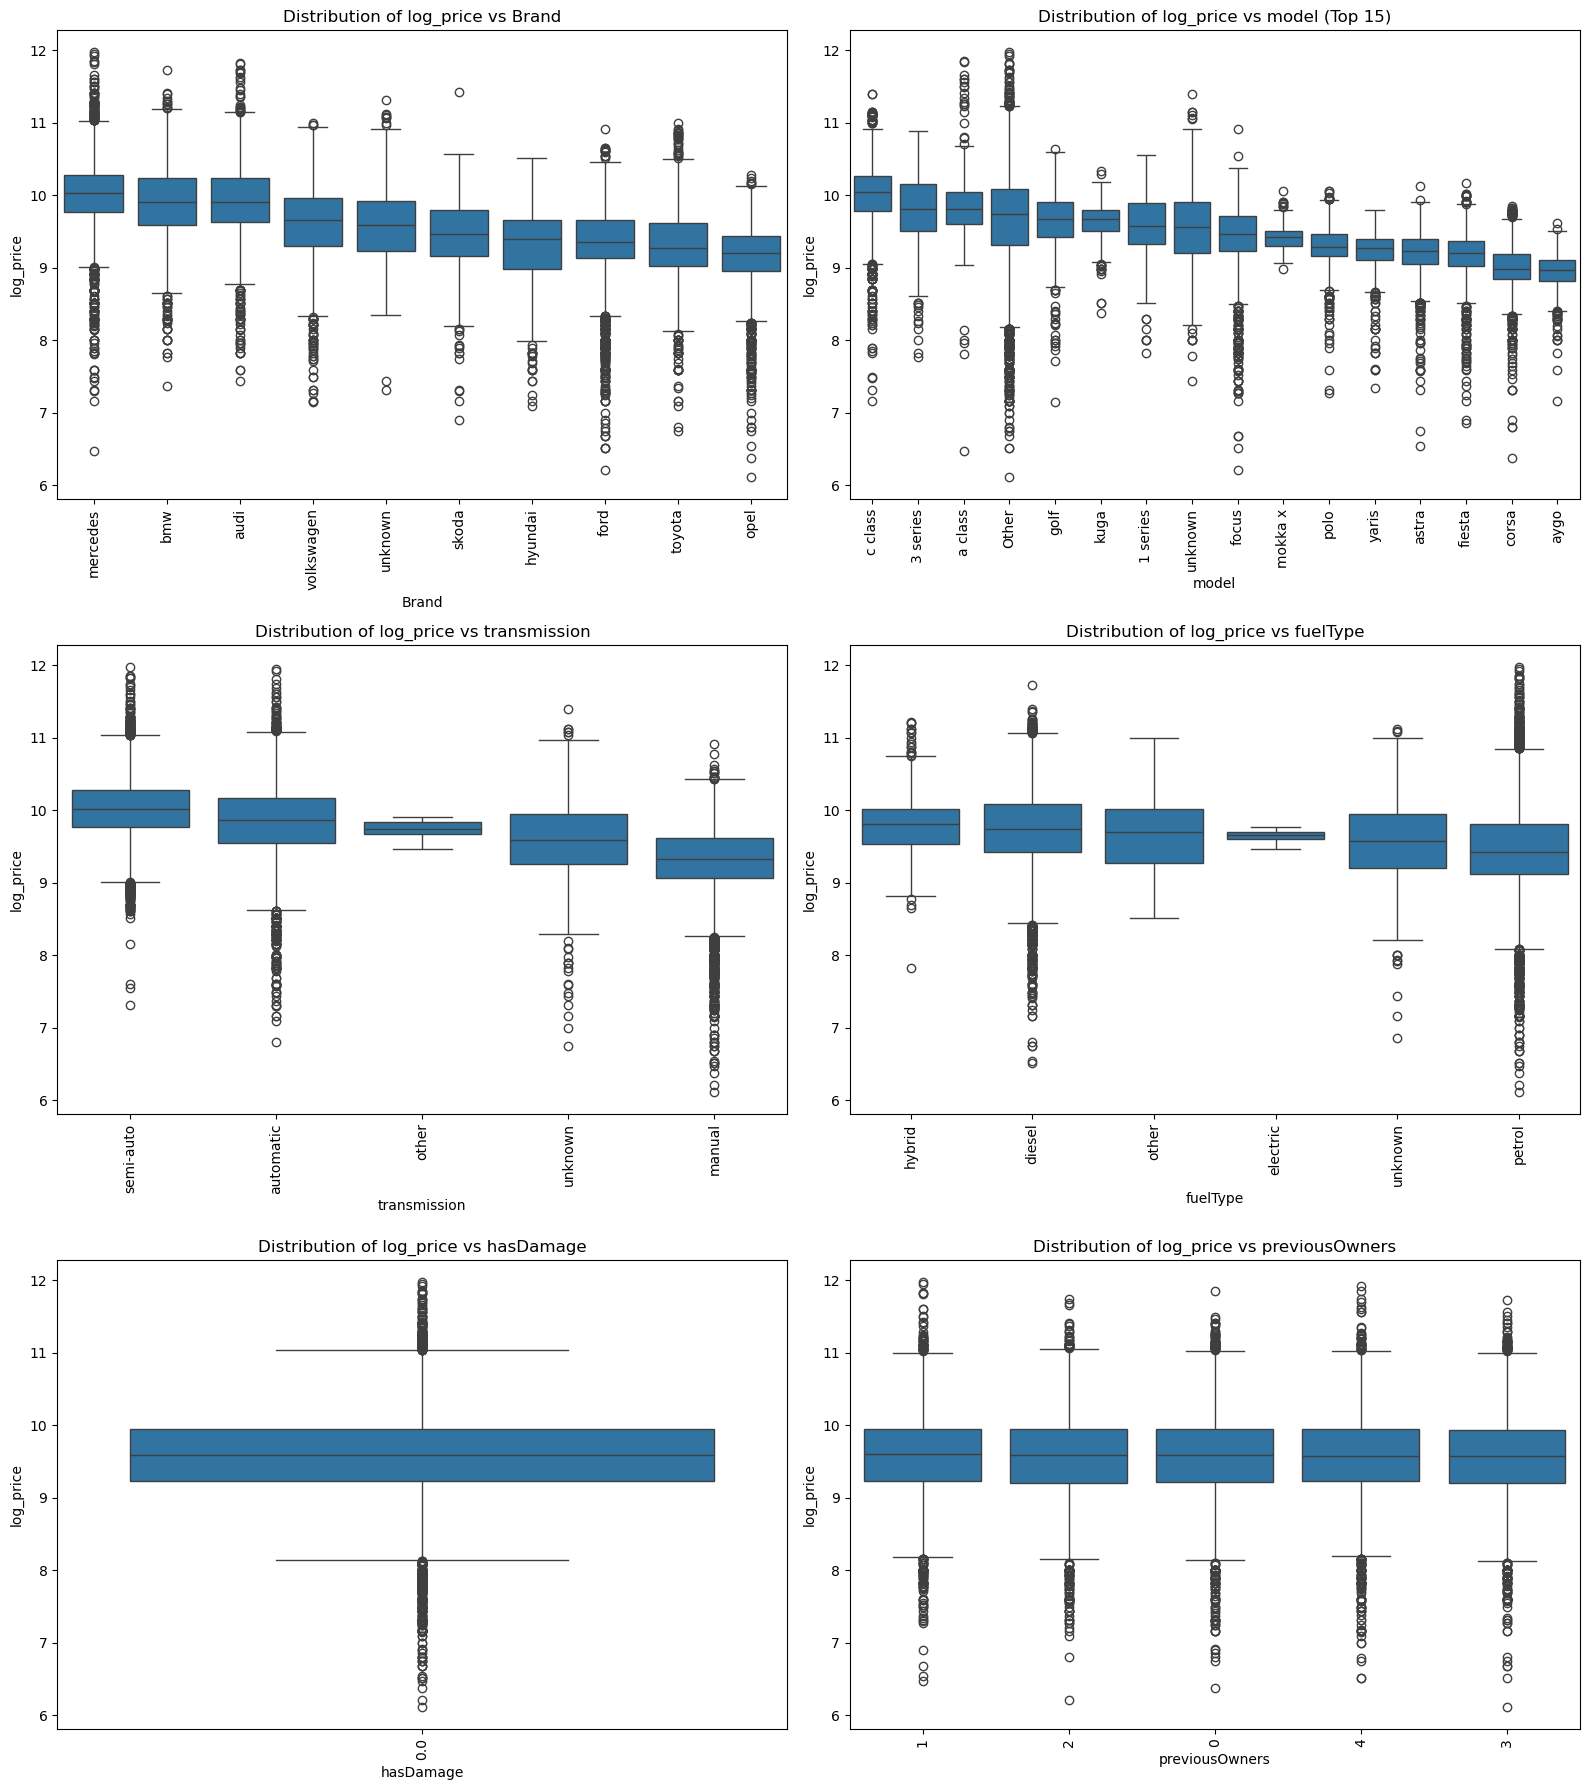

In [45]:
# Combine X_train and y_train_log for visualization
plot_df = X_train.copy()
plot_df['log_price'] = y_train_log.values

ncols = 2
nrows = math.ceil(len(categorical_features) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(16, nrows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    ax = axes[i]
    
    # Specific approach for high cardinality (model)
    if col == 'model':
        # Find the 15 most frequent models
        top_15_models = plot_df[col].value_counts().nlargest(15).index
        
        # create a copy for visualization, grouping rare ones
        plot_df_model = plot_df.copy()
        plot_df_model[col] = plot_df_model[col].apply(lambda x: x if x in top_15_models else 'Other')
        
        # Calculate the correct order (descending median) for the boxplots
        order = plot_df_model.groupby(col)['log_price'].median().sort_values(ascending=False).index
        
        sns.boxplot(data=plot_df_model, x=col, y='log_price', ax=ax, order=order)
        ax.set_title(f'Distribution of log_price vs {col} (Top 15)')
    
    # Standard approach for low cardinality
    else:
        # Calculate the order by median
        order = plot_df.groupby(col)['log_price'].median().sort_values(ascending=False).index
        
        sns.boxplot(data=plot_df, x=col, y='log_price', ax=ax, order=order)
        ax.set_title(f'Distribution of log_price vs {col}')
        
    ax.tick_params(axis='x', rotation=90)

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The categorical analysis reveals strong and consistent trends:

* Premium brands such as Mercedes, Audi, and BMW clearly lead in `log_price`, confirming that brand reputation is a major value driver. 
* Automatic transmission and petrol or hybrid engines are also associated with higher prices, while diesel vehicles and damaged cars tend to lose value. 
* The number of previous owners shows a steady downward effect on price, aligning with buyer expectations.  

Overall, categorical variables show solid, interpretable patterns that match real-world market dynamics and justify their inclusion in the predictive model.


## 6 - Feature Engineering

We are now going to preform feature engineering . This step is crucial for maximizing model performance by transforming raw, observed variables into features that have higher explanatory power. Our goal is to move beyond the variables provided and create logical relationships within the dataset.

### 6.1 - `age`

From a business perspective, a car's `year` of manufacturing is not a strong price driving factor. Price is mainly affected by depreciation, which is a simple function of time. 
Therefore we are going to engineer the `age` feature to transform the provided `year` feature into a measurable variable that captures the true rate of depreciation. This makes the price relationship much simpler and clearer for the model to learn.


In [46]:
# We assume the present year is 2025

present_year = 2025
X_train['age'] = present_year - X_train['year']
X_val['age'] = present_year - X_val['year']

### 6.2 - `mileage_per_year`

Similarly, total mileage alone doesn't give a full picture of a car's condition. It is more relevant to know during how many years did that car accumulated that mileage. Therefore, we are going to create the `mileage_per_year` feature to measure the car's usage intensity. This metric provides a more accurate way to predict vehicle wear-and-tear than total mileage.

In [47]:
# Creating 'mileage_per_year' feature

# We use np.where to avoid division by zero.
# If age is 0, we can assume mileage_per_year is just its total mileage.
X_train['mileage_per_year'] = np.where(
    X_train['age'] == 0, 
    X_train['mileage'], 
    X_train['mileage'] / X_train['age']
)

X_val['mileage_per_year'] = np.where(
    X_val['age'] == 0, 
    X_val['mileage'], 
    X_val['mileage'] / X_val['age']
)

## 9- Preprocessing Pipeline: Feature Encoding and Scaling

Before we can train our model, we must address two critical issues with our cleaned X_train dataset. 

First, since our model is a mathematical algorithm, it cannot interpret raw text features. 
Second, our numerical features have vastly different scales, which, as discussed, would unfairly bias the model's penalty.

To solve this, we will now construct a preprocessing pipeline. This pipeline will:
* __Encode__ our categorical features, converting them into a numerical format.
* __Scale__ our numerical features, putting them all on a level playing field.

We will use a `ColumnTransformer` to apply these steps systematically, ensuring we fit our preprocessors only on X_train and apply the same learned transformations to both X_train and X_val, thereby preventing any data leakage.

### 9.1 - Defining the Categorical Encoders

Our EDA revealed that the model feature has very high cardinality. We cannot use one-hot encoding directly, as this would create too many new features.

To solve this in a robust and interpretable way, we will build a preprocessing pipeline. This pipeline will:

* __For high-cardinality features:__ Group all rare categories  into a single "Other" category. We will then apply a standard OneHotEncoder to this new, much smaller set of categories.

* __For low-cardinality features:__ Use a standard OneHotEncoder directly.

In [48]:
# Define custom transformer for rare labels
class RareLabelEncoder(BaseEstimator, TransformerMixin):
    """
    Groups infrequent categories into a single 'Other' category.
    This is a feature engineering step to handle high-cardinality.
    """
    def __init__(self, threshold=0.01, label='Other'):
        self.threshold = threshold
        self.label = label
    
    def fit(self, X, y=None):
        self.top_categories_ = {}
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
            
        for col in X.columns:
            # Calculate value counts and proportions
            counts = X[col].value_counts()
            proportions = counts / len(X)
            # Find categories above the threshold
            frequent_cats = proportions[proportions >= self.threshold].index
            self.top_categories_[col] = frequent_cats
        return self
    
    def transform(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
            
        X_copy = X.copy()
        for col in X_copy.columns:
            if col in self.top_categories_:
                 X_copy[col] = X_copy[col].apply(lambda x: x if x in self.top_categories_[col] else self.label)
        return X_copy

# Define Feature Lists
high_cardinality_features = ['model']
low_cardinality_features = ['Brand', 'transmission', 'fuelType', 'hasDamage']

# Encoding

# High-cardinality features
high_card_transformer = Pipeline(steps=[
    # Group rare labels
    ('rare_label_enc', RareLabelEncoder(threshold=0.01, label='Other')),
    # One-hot encode
    ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Low-cardinality features
low_card_transformer = Pipeline(steps=[
    ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

### 9.2 - Defining the Numerical Scaler

Now we must build the transformer for our numerical features.

This step is critical for two reasons. 

* __1 -__ our numerical features exist on vastly different scales. For example, `mileage` is in the tens of thousands, while `engineSize` is a single digit. Without scaling, the algorithm would incorrectly assume that `mileage` is thousands of times more important than `engineSize`, simply because its numbers are larger. Scaling puts all features on a level playing field, allowing a model to judge them fairly on their predictive power.

* __2 -__ our EDA clearly showed that key features like `mileage`, `tax`, and `mpg` are skewed and contain a considerable number of outliers. If we used a StandardScaler (which relies on the mean), these extreme values would corrupt our scaling. Therefore, we will use RobustScaler. This scaler uses the median and the interquartile range (IQR), which are "robust" to outliers.

In [49]:
# Create the Numeric Transformer
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

## 10 - Model Selection, Training, and Evaluation

Considering the nature of our data, we have  chosen the LASSO (Least Absolute Shrinkage and Selection Operator) Regression algorithm as our initial model. This decision is fundamentally driven by the need to efficiently manage the complexities of our prepared feature set while establishing a stable and transparent performance baseline.

The selection of LASSO over standard linear regression is justified by its ability to solve two primary challenges simultaneously:

__1. Embedded Feature Selection (The L1 Penalty)__

Our preprocessing steps, particularly the One-Hot Encoding applied to high-cardinality features like model, result in a feature matrix with numerous sparse columns. The LASSO model incorporates an L1 regularization penalty that has the ability to push the coefficients of redundant or noisy features exactly to zero. This mechanism automatically selects the most relevant subset of features, preventing our model from being overwhelmed by noise and high dimensionality.

__2. Establishing a Transparent Baseline__

As a linear regression variant, LASSO is highly interpretable. The magnitude and sign of the resulting coefficients directly indicate the positive or negative impact of each feature on the log(price). By starting with LASSO, we quickly generate a robust performance benchmark (RMSE) and gain clear, justifiable insight into the fundamental economic drivers of car pricing.

### 10.1 - Validation Pipeline

With our preprocessing components defined, we will now assemble them into a single, automated workflow. Our dataset requires a mix of transformations—scaling for numerics, simple OHE for low-cardinality features, and rare-label encoding for high-cardinality features.

To manage this complexity, we will use two key scikit-learn objects:

* __ColumnTransformer:__ This is our "master preprocessor." It intelligently applies our numeric_transformer, low_card_transformer, and high_card_transformer only to their designated columns.

* __Pipeline:__ This object chains our ColumnTransformer (as the 'preprocessor') and our LassoCV (as the 'model') into one sequential workflow.

This end-to-end pipeline approach is critical for model validation. We will train (fit) this entire system only on our 70% training split (X_train). The trained pipeline will then be used to generate predictions on the unseen 30% validation set (X_val), giving us an unbiased measure of our model's true performance (RMSE) and proving its ability to generalize. This automated "preprocess-then-train" workflow is the standard for ensuring zero data leakage between our training and validation sets.

In [50]:
# Defining numerical features to use in the model
numerical_features_model = ['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'age']

# 1. Assemble the "Master Preprocessor" (ColumnTransformer)
# This combines all three sub-pipelines into one object.
preprocessor = ColumnTransformer(
    transformers=[
        # Scaling Team: Apply RobustScaler to numerical features
        ('num', numeric_transformer, numerical_features_model), # CORRECTED VARIABLE NAME
        
        # Encoding (Low-Card): Apply OHE directly
        ('low_card', low_card_transformer, low_cardinality_features),
        
        # Encoding (High-Card): Apply RareLabelEncoder + OHE
        ('high_card', high_card_transformer, high_cardinality_features)
    ],
    # 'remainder' set to 'drop' ensures only the columns we explicitly transformed are kept.
    remainder='drop' 
)


# 2. Create the FINAL MODEL PIPELINE
# We chain the preprocessor (all feature work) and the LassoCV model (feature selection + training).
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LassoCV(cv=5, random_state=RSEED, max_iter=5000, n_jobs=-1)) 
])


# 3. TRAIN THE MODEL
# This single command executes all preprocessing fitting and model training automatically.
lasso_pipeline.fit(X_train, y_train_log)


# 4. EVALUATE THE MODEL ON THE VALIDATION SET
y_val_pred_log = lasso_pipeline.predict(X_val)

# --- Metrics on the Log Scale (Model's Training Domain) ---

# RMSE (Log Scale)
rmse_log = np.sqrt(mean_squared_error(y_val_log, y_val_pred_log))

# R-squared (Log Scale)
r2_log = r2_score(y_val_log, y_val_pred_log)

# MAE (Log Scale)
mae_log = mean_absolute_error(y_val_log, y_val_pred_log)


print("\n--- Model Evaluation (Log Scale) ---")
print(f"Validation RMSE (log scale): {rmse_log:.4f}")
print(f"Validation R² Score (log scale): {r2_log:.4f}")
print(f"Validation MAE (log scale): {mae_log:.4f}")


# Metrics on the Original Price Scale (Real-World Interpretation)

# Un-log the true validation prices
y_val_unlogged = np.expm1(y_val_log)

# Un-log the predicted validation prices ( WE CAN´T ROUND HERE )
y_val_pred_unlogged = np.expm1(y_val_pred_log) 

# RMSE (Original Scale)
real_rmse = np.sqrt(mean_squared_error(y_val_unlogged, y_val_pred_unlogged))

# MAE (Original Scale)
real_mae = mean_absolute_error(y_val_unlogged, y_val_pred_unlogged)


print("\n--- Model Evaluation (Original Price Scale) ---")
print(f"Validation RMSE (original scale): ${real_rmse:,.2f}")
print(f"Validation MAE (original scale): ${real_mae:,.2f}")


--- Model Evaluation (Log Scale) ---
Validation RMSE (log scale): 0.1957
Validation R² Score (log scale): 0.8638
Validation MAE (log scale): 0.1411

--- Model Evaluation (Original Price Scale) ---
Validation RMSE (original scale): $4,205.40
Validation MAE (original scale): $2,446.31


This output provides a complete assessment of our baseline LASSO model's performance across three key metrics on both the transformed and original scales.

#### __1. Performance on the Log Scale (Model's Optimized Domain)__

* __R squared of 0.8638:__ This excellent result confirms that 86.38% of the variance in the log(price) is successfully explained by our set of engineered and selected features, validating our feature engineering strategy.
* __RMSE of 0.1957:__ This low error on the log scale indicates the model is performing very well in its linear domain, effectively minimizing residual error.
* __MAE of 0.1411:__ The model's average error on the log scale is very small, reinforcing its stability.

#### __2. Performance on the Original Price Scale (Real-World Domain, in US dollars)__

##### __RMSE of 4,205.40 and MAE of 2,446.31 :__

* The MAE of 2,446.31 is highly interpretable, meaning that on average, our model's prediction is off by approximately 2,400.

* The large disparity between the RMSE and the MAE is a critical diagnostic signal. This gap indicates that the model is struggling with a small number of very large residual errors (outliers) on the highest-priced vehicles. Because the RMSE squares these large errors, its value is significantly inflated compared to the MAE.

#### __In summary__ 
The model has established a stable and highly predictive baseline (R squared >0.86), but its linear structure is reaching its limit in predicting market extremes. This diagnostic result provides strong justification for the next step: implementing a non-linear, tree-based model to specifically address the large residual errors shown by the RMSE-MAE gap.

### 10.2 - Feature Selection Analysis

Since LASSO automatically selects the most relevant features on our dataset, it is important to understand and analyze it's feature selection.

The following code "looks inside" the trained pipeline to extract the final model coefficients. It matches each coefficient (the model's measure of a feature's importance) to its corresponding feature name, including all the new features created by our OneHotEncoder.

This analysis will show us exactly which features the model decided to keep (those with non-zero coefficients) and which it ignored (those set to zero).


--- Model Interpretation ---
LassoCV selected 44 features
LassoCV set 12 features to zero.

--- Features Set to Zero (Ignored by Model) ---
['transmission_other', 'fuelType_diesel', 'fuelType_electric', 'fuelType_other', 'fuelType_unknown', 'hasDamage_0.0', 'model_3 series', 'model_a class', 'model_a3', 'model_a4', 'model_e class', 'model_octavia']


--- Top 15 Most Important Features (Positive) ---
These features INCREASE the predicted price.
Brand_audi          0.263507
Brand_mercedes      0.242391
engineSize          0.225751
model_tiguan        0.183182
Brand_bmw           0.181523
fuelType_hybrid     0.179106
model_tucson        0.153850
model_kuga          0.119554
model_focus         0.113745
model_golf          0.099239
model_Other         0.061780
model_q3            0.057952
model_mokka x       0.043754
Brand_volkswagen    0.037122
Brand_unknown       0.019956
dtype: float64


--- Top 15 Most Important Features (Negative) ---
These features DECREASE the predicted price.
age 

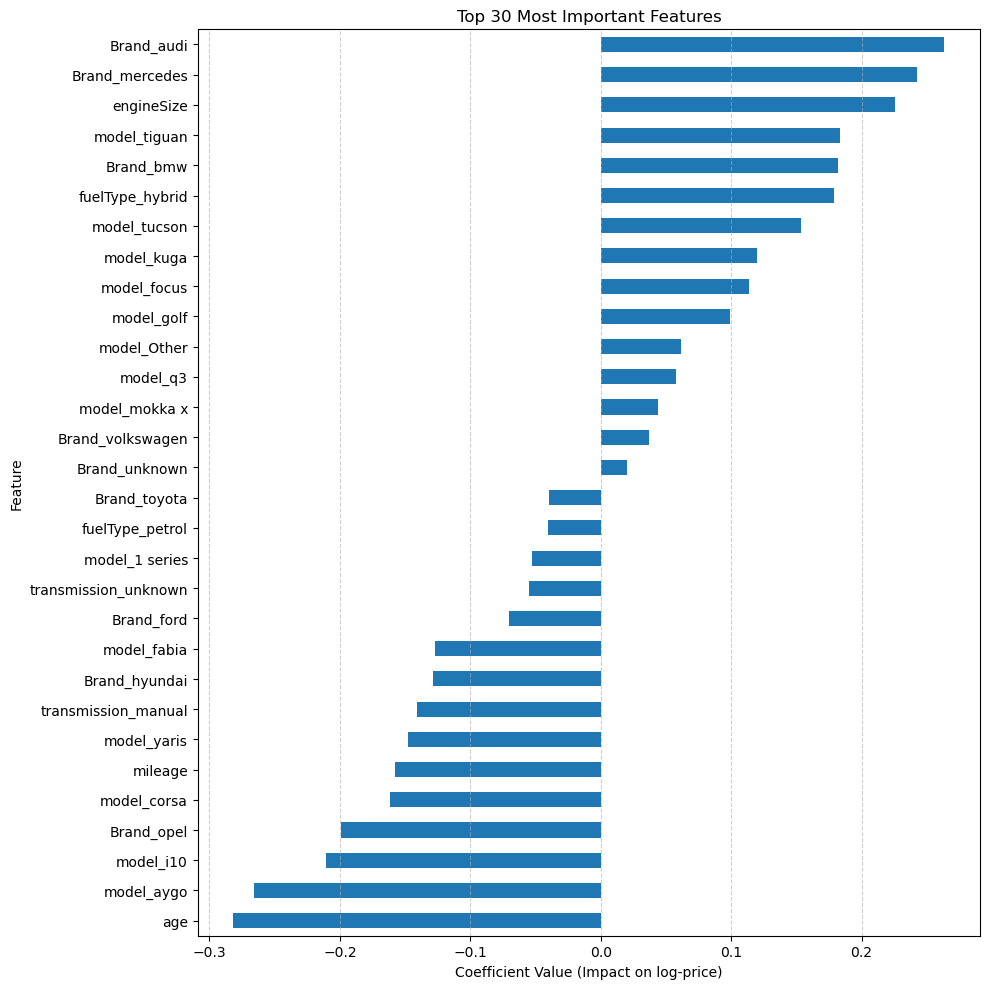

In [51]:
# Access the trained model and preprocessor from the pipeline
model = lasso_pipeline.named_steps['model']
preprocessor = lasso_pipeline.named_steps['preprocessor']

# 2. Get the feature names from the preprocessor
num_features = preprocessor.transformers_[0][2]
    
# Get low-cardinality feature names
low_card_pipeline = preprocessor.named_transformers_['low_card']
low_card_ohe = low_card_pipeline.named_steps['one_hot']
low_card_names = preprocessor.transformers_[1][2]
low_card_features = low_card_ohe.get_feature_names_out(input_features=low_card_names)
    
# Get high-cardinality feature names
high_card_pipeline = preprocessor.named_transformers_['high_card']
high_card_ohe = high_card_pipeline.named_steps['one_hot']
high_card_names = preprocessor.transformers_[2][2]
high_card_features = high_card_ohe.get_feature_names_out(input_features=high_card_names)
    
# Combine all names
feature_names = list(num_features) + list(low_card_features) + list(high_card_features)

# Create a Series of coefficients, indexed by their feature names
coefficients = pd.Series(model.coef_, index=feature_names)

# 4. Print the results
print("\n--- Model Interpretation ---")
print(f"LassoCV selected {len(coefficients[coefficients != 0])} features")
print(f"LassoCV set {len(coefficients[coefficients == 0])} features to zero.\n")

# Print the features that were eliminated
print("--- Features Set to Zero (Ignored by Model) ---")
print(coefficients[coefficients == 0].index.tolist())
print("\n")

# Print the most important features
print("--- Top 15 Most Important Features (Positive) ---")
print("These features INCREASE the predicted price.")
print(coefficients.sort_values(ascending=False).head(15))
print("\n")

print("--- Top 15 Most Important Features (Negative) ---")
print("These features DECREASE the predicted price.")
print(coefficients.sort_values(ascending=True).head(15))
print("\n")

# Visualize the coefficients
top_coeffs = pd.concat([
    coefficients.sort_values().head(15), # Top 15 negative
    coefficients.sort_values().tail(15)  # Top 15 positive
])

plt.figure(figsize=(10, 10))
top_coeffs.plot(kind='barh')
plt.title('Top 30 Most Important Features')
plt.xlabel('Coefficient Value (Impact on log-price)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The model's final set of coefficients provides evidence of feature importance, effectively removing redundant variables and isolating the core economic drivers of car price.

We can draw three main conclusions from this analysis:

__Effective Feature Pruning and Simplicity__ 

* LASSO successfully drove the coefficients of 12 features to zero, including highly sparse or weakly predictive categories like fuelType_other, model_a class, and transmission_other. This confirms the model's ability to automatically select the most relevant variables, significantly reducing model complexity and noise while maintaining high predictive power.

__Age and Brand Drive Depreciation and Premium__

* Age is the Single Strongest Negative Predictor: With a coefficient of −0.281710, age is the most influential feature, confirming that time-based depreciation is the dominant factor in car value.

* Luxury Brands Command the Highest Premium: Features related to high-end manufacturers (Brand_audi, Brand_mercedes, Brand_bmw) have the largest positive coefficients, while economy/family brands (Brand_opel, Brand_hyundai) are associated with the largest negative coefficients. This clearly establishes Brand as the primary driver of price premium.

__Efficiency and Cost are Associated with Lower Prices__

* Usage and Transmission: High mileage (−0.158019) and transmission_manual (−0.140886) both significantly decrease the predicted price, indicating that car usage and less convenient (or less premium) technology are penalized.

* Engine Size is Highly Valued: Conversely, engineSize (+0.225751) is one of the highest positive predictors, suggesting that larger, more powerful engines are strongly valued in the current market, often outweighing tax or fuel efficiency concerns.

In summary, the LASSO model has validated our preprocessing efforts by selecting a set of 44 features. This selection, heavily weighted by Age, Brand, and Engine Size, provides a robust and interpretable baseline that will now inform and guide the construction of our final, potentially non-linear, predictive model.

#### 10.2.1 - Original Features vs. Engineered Features

In order to assess which features (originals or engineered) had the most relevance, we ran the model only with the original features (`year`, `mileage`), and only with the engineered features(`age`, `mileage_per_year`). 
It is important to note that we did not include both model tests on the present notebook, has it would overload it.

The key findings from this comparrison were:

* `age` is the Best Predictor of Depreciation: Our experiment confirmed that age is a more powerful and direct predictor than`year`. As the importance plot shows, age is now the single strongest negative predictor in our model, which is perfectly logical.

* `mileage` is the Best Predictor of Wear: We found that the original `mileage` feature is a stronger signal than `mileage_per_year`.

That being said, and based on these findings, our final model uses `age` and `mileage`, while `year` and `mileage_per_year` have been removed.



### 10.3 - Production Pipeline

Having successfully validated our model's performance on a hold-out set, we now move from validation to production. The goal is no longer to measure performance, but to build the single most accurate model possible for our final submission.

To do this, we will construct our definitive pipeline. This pipeline is an enhancement of our validation version, as it now fully encapsulates every step—including the create_features engineering step—using a FunctionTransformer.

We will train this complete, end-to-end pipeline on 100% of our training data. By using all available information, we ensure the LassoCV model learns from the entire dataset, maximizing its predictive power. This is the final, optimized model that will be used to generate the predictions for the test.csv file.

In [52]:
# CUSTOM FUNCTION
def create_features(X):
    """
    Creates 'age' feature from 'year'.
    """
    present_year = 2025
    X_copy = X.copy()
    
    X_copy['year'] = pd.to_numeric(X_copy['year'], errors='coerce')
    
    X_copy['age'] = present_year - X_copy['year']
    
    # Handle potential NaNs created by 'coerce' if any 'year' was bad and impute with the median
    X_copy['age'] = X_copy['age'].fillna(X_copy['age'].median())
    
    return X_copy

# CORRECTED CUSTOM CLASS
class RareLabelEncoder(BaseEstimator, TransformerMixin):
    """
    Groups infrequent categories into a single 'Other' category.
    This version is corrected to be internally consistent.
    """
    def __init__(self, tol=0.01, n_categories=2, replace_with='Other'):
        self.tol = tol
        self.n_categories = n_categories
        self.replace_with = replace_with
    
    def fit(self, X, y=None):
        self.top_categories_ = {}
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
            
        for col in X.columns:
            counts = X[col].value_counts()
            proportions = counts / len(X)
            # Find categories above the threshold
            frequent_cats = proportions[proportions >= self.tol].index
            self.top_categories_[col] = frequent_cats
        return self
    
    def transform(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
            
        X_copy = X.copy()
        for col in X_copy.columns:
            if col in self.top_categories_:
                 X_copy[col] = X_copy[col].apply(lambda x: x if x in self.top_categories_[col] else self.replace_with)
        return X_copy

# Load 100% of the raw training data
train_full_raw = pd.read_csv("train.csv")
X_full = train_full_raw.drop('price', axis=1).set_index('carID')
y_full_log = np.log1p(train_full_raw['price'])

# Define final pipeline
# Feature Engineering Transformer
feature_engineer = FunctionTransformer(create_features, validate=False)

# Numeric Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Categorical Pipelines
low_cardinality_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

high_cardinality_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # This call now matches the corrected class definition
    ('rare_label', RareLabelEncoder(tol=0.01, n_categories=2, replace_with='Other')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Corrected Feature Lists
numeric_features = ['age', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']
low_cardinality_features = ['Brand', 'transmission', 'fuelType']
high_cardinality_features = ['model']

# Preprocessing ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_low', low_cardinality_transformer, low_cardinality_features),
        ('cat_high', high_cardinality_transformer, high_cardinality_features)
    ],
    remainder='drop' # Drops 'year' and 'hasDamage'
)

# Final Pipeline
final_lasso_pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineer), # Create 'age'
    ('preprocessing', preprocessor),          # Preprocess all features
    ('model', LassoCV(alphas=np.logspace(-5, 0, 100), cv=10, random_state=RSEED, n_jobs=-1, tol=0.01))
])

# Fit this final pipeline on all the training data
final_lasso_pipeline.fit(X_full, y_full_log)

Pipeline(steps=[('feature_engineering',
                 FunctionTransformer(func=<function create_features at 0x30e82dda0>)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'mileage', 'tax',
                                                   'mpg', 'engineSize',
                                                   'paintQuality%',
                                                   'previousOwners']),
                                                 ('cat_low',
                                                  Pipeline(ste...
       6.89261210e-02, 7.74263683e-02, 8.69749003e-02, 9.77009957e-02,
       1.09749877e-01, 1.23284674e-01, 1.38488637e-01, 1.55567614e-01,
       1.74752840e-01, 1.96304065e-01, 2.20513074e-01, 2.47707636e-01,
       2.78255940e-01, 3.12571585e-01, 3.51119173e-01, 3.94420606e-01,
       4.43062146e-01, 4.97702356e-01, 5.59081018e-01, 6.28029144e-01,
       7.05480231e-01, 7.92482898e-01, 8.90215085e-01, 1.00000000e+00]),
                         cv=10, n_jobs=-1, random_state=42, tol=0.01))])

We will now use our fully-trained final_lasso_pipeline (which was fitted on 100% of the training data) to generate the predictions for the unseen test.csv.

In [53]:
# 1. Load RAW Test Data
test_data_raw = pd.read_csv("test.csv")
X_test_final = test_data_raw.set_index('carID')

# Generate Prediction
log_price_predictions = final_lasso_pipeline.predict(X_test_final)

# Revert the log-transform
final_price_predictions = np.expm1(log_price_predictions)

# Create the final DataFrame
submission = pd.DataFrame({
    "carID": X_test_final.index,
    "price": final_price_predictions
})

# Round to 2 decimal places
submission['price'] = submission['price'].round(2)

# Save the file
submission.to_csv("submission_final.csv", index=False)
print(submission.head(10))

    carID     price
0   89856  21968.21
1  106581  32585.66
2   80886  13128.90
3  100174  12863.63
4   81376  29412.64
5   85391  10104.86
6   82175  13836.59
7   95250  17707.70
8   85071   5521.05
9   96210  17784.97


## 11 - Final Conclusion: Model Performance and Future Strategy

The successful execution of our end-to-end machine learning pipeline has culminated in a well-validated and fully production-ready baseline model. Our approach (from detailed data cleaning to a robust pipeline design) has provided a solid foundation for this project.

### 11.1 - The Lasso Baseline: Strengths and Limitations

Our LASSO Regression model, chosen for its embedded feature selection and interpretability, delivered the following validated performance metrics:

| **Metric**      | **Scale**        | **Result**     | **Insight** |
|-----------------|------------------|----------------|-------------|
| **R² Score**    | Log              | 0.8638     | 86.38% of the price variance is explained by our features (excellent fit). |
| **MAE**         | Original Price (in dollars)   | 2,446.31  | On average, the model's error is relatively small, confirming overall stability. |
| **RMSE**        | Original Price (in dollars)   | 4,205.40  | The final metric for the competition. |



While the model achieved a strong R squared score, the significant gap between the RMSE (4,205.40) and the MAE (2,446.31) is the primary diagnostic insight. This disparity confirms the linear model is failing to accurately predict a small number of high-value outliers (luxury or highly unique vehicles).

### 11.2 - Future Strategy: Transition to Tree-Based Modeling

In order to reduce the final RMSE and move toward the highest level of predictive accuracy, the next logical step is to transition to a non-linear, tree-based ensemble model.

One possible strategy is the implementation of a Gradient Boosting Regressor, such as XGBoost or LightGBM, for the following reasons:

* __Outlier Robustness:__ Tree-based models are inherently resistant to the non-linear extremes and outliers that challenged our linear LASSO model, allowing them to better capture the complex pricing structure of high-value cars.

* __Capturing Interactions:__ These models automatically capture high-order feature interactions (e.g., the differential pricing effect of a high-mileage Audi versus a high-mileage Ford), which a linear model cannot handle without manual feature crosses.

* __Maximum Predictive Power:__ By layering an advanced non-linear model on top of our cleaned and engineered feature set, we intend to achieve the lowest possible error.